In [4]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx


In [15]:

#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 
#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 


fly_nums = list(range(1389,1402))
fly_nums = list(range())


multi_fly_df = util.construct_multi_fly_df(fly_nums)

all_stim_df = multi_fly_df



Making dataframe for fly number 1389
Making dataframe for fly number 1390
Making dataframe for fly number 1391
Making dataframe for fly number 1392
Making dataframe for fly number 1393
Making dataframe for fly number 1394
Making dataframe for fly number 1395
Making dataframe for fly number 1396
Making dataframe for fly number 1397
Making dataframe for fly number 1398
Making dataframe for fly number 1399
Making dataframe for fly number 1400
Making dataframe for fly number 1401


In [2]:

fly_nums = range(1707, 1709) + range(1711, 1714) + range (1715, 1719) + range(1719, 1722) + range(1722, 1727) + range(1729, 1730)# +   range(1731, 1732)## last one are the newest trials -- 
#figure out whats wrong with kine cam?
multi_fly_df = util.construct_multi_fly_df(fly_nums)

Making dataframe for fly number 1707
Making dataframe for fly number 1708
Making dataframe for fly number 1711
Making dataframe for fly number 1712
Making dataframe for fly number 1713
Making dataframe for fly number 1715
Making dataframe for fly number 1716
Making dataframe for fly number 1717
Making dataframe for fly number 1718
Making dataframe for fly number 1719
Making dataframe for fly number 1720
Making dataframe for fly number 1721
Making dataframe for fly number 1722
Making dataframe for fly number 1723
Making dataframe for fly number 1724
Making dataframe for fly number 1725
Making dataframe for fly number 1726
Making dataframe for fly number 1729


In [5]:

def normd_5_per(fly_num, muscle):
        df=multi_fly_df.loc[multi_fly_df['fly_num']==fly_num]
        a = len(df[muscle])
        m = df[muscle]
        #a_5p = a*5/100.
        #a_5pr = round(a_5p)
        #minimums_5p = arr.argsort()[:a_5pr]
        #maximums_5p = arr.argsort()[:-a_5pr]
        #minimums_5p = np.argpartition(df, a_5pr)
        print("5th percentile:   ", np.percentile(m, 5))
        muscle_min = np.percentile(m, 5)
        print("95th percentile:   ", np.percentile(m, 75))
        muscle_max = np.percentile(m, 95)

        normalized = (m-muscle_min)/(muscle_max-muscle_min)
        return normalized

In [28]:
#def normd (muscle_data):
#    x = muscle_data
#    normalized = (x-min(x))/(max(x)-min(x))
#    return normalized

def normd(muscle_data):#(fly_num, muscle):
        #df=multi_fly_df.loc[multi_fly_df['fly_num']==fly_num]
        #a = len(df[muscle])
        #m = df[muscle]
        
        m = muscle_data
        #a_5p = a*5/100.
        #a_5pr = round(a_5p)
        #minimums_5p = arr.argsort()[:a_5pr]
        #maximums_5p = arr.argsort()[:-a_5pr]
        #minimums_5p = np.argpartition(df, a_5pr)
        print("1st percentile:   ", np.percentile(m, 5))
        muscle_min = np.percentile(m, 1)
        print("99th percentile:   ", np.percentile(m, 75))
        muscle_max = np.percentile(m, 99)

        normalized = (m-muscle_min)/(muscle_max-muscle_min)
        return normalized

In [10]:
#flylist = [flb.NetFly(fn) for fn in range(1389,1402)]
flylist = [flb.NetFly(fn) for fn in range(1707, 1709) + range(1711, 1714) + range (1715, 1719) + range(1719, 1722) + range(1722, 1727) + range(1729, 1730)]# +   range(1731, 1732)## last one are the newest trials -- 
#figure out whats wrong with kine cam?
[fly.open_signals() for fly in flylist]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [13]:
flylist = [flb.NetFly(fn) for fn in range(1389,1402)]
[fly.open_signals() for fly in flylist]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [6]:
multi_fly_df['l_plus_r'] = multi_fly_df['left_amp'] + multi_fly_df['right_amp']
all_stim_df = multi_fly_df


In [7]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right' 'l_plus_r']
['exc_cl_starfield, g_x = 1, g_y=0, b_x =0, b_y = 0, ch=0'
 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pretrial_stripe_fix'
 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'trials_ended' 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']


In [8]:

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [9]:
turn_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0']
turn_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0']
WSA_increase = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0']
WSA_decrease = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0']


In [9]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [9]:
turn_left.head()

t                                stimulus  amp_diff  left_amp  \
4291  85.821814  cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0  0.259057  1.113822   
4292  85.841815  cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0       NaN       NaN   
4293  85.861815  cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0       NaN       NaN   
4294  85.881816  cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0  0.225845  1.113822   
4295  85.901816  cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0  0.225845  1.113822   

      right_amp  fly_num    wbf experimental_condition   pr_left  tpd_left  \
4291   0.854764     1389  196.5     condition=baseline  2.353217  1.847417   
4292   0.881334     1389  196.5     condition=baseline  2.340178  1.837865   
4293   0.881334     1389  196.5     condition=baseline  2.340178  1.837865   
4294   0.887977     1389  196.5     condition=baseline  2.324724  1.847873   
4295   0.887977     1389  196.0     condition=baseline  2.324724  1.847873   

        ...     hg3_right  hg1_right  i1_right  bkg_right  b1_right  b2_right  \
4291    ...           0.0   8.638967  3.367114  31.649204  5.551908  0.609672   
4292    ...           0.0   9.141731  3.340759  31.620682  5.624682  0.572844   
4293    ...           0.0   9.141731  3.340759  31.620682  5.624682  0.572844   
4294    ...           0.0   8.691837  3.224332  31.643182  5.629723  0.585628   
4295    ...           0.0   8.691837  3.224332  31.643182  5.629723  0.585628   

       b3_right  iii24_right  hg4_right  l_plus_r  
4291  10.314173     1.345080   2.325033  1.968586  
4292  10.237155     0.791526   2.482936       NaN  
4293  10.237155     0.791526   2.482936       NaN  
4294  10.231885     0.539328   2.294296  2.001799  
4295  10.231885     0.539328   2.294296  2.001799  

[5 rows x 41 columns]

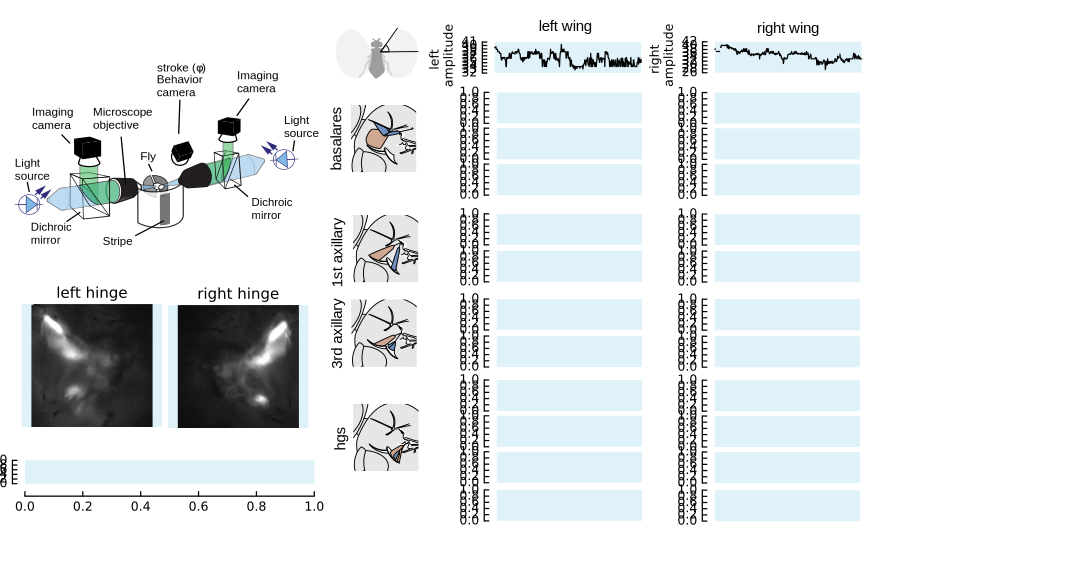

In [12]:

from matplotlib.animation import FuncAnimation

import figurefirst as fifi

layout = fifi.FigureLayout('paper_figure_1_v2.svg',make_mplfigures = True)

#layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['yaw_left'].fill_between(time, (mean_WBA-error), (mean_WBA + error),alpha = 0.1)

#layout.axes['yaw_right'].plot(time, mean_WBA_turn_right) #,'o',alpha = 0.2)
#layout.axes['yaw_right'].fill_between(time, (mean_WBA_turn_right-error_turn_right), (mean_WBA_turn_right + error_turn_right),alpha = 0.1)


fly = flylist[1]
#snum = 5
snum = 3

#df.loc[df['Value'].idxmax()]

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)

b1l = fly.normed_signals['left', 'b1'][idxs]
b1r = fly.normed_signals['right', 'b1'][idxs]

b2l = fly.normed_signals['left', 'b2'][idxs]
b2r = fly.normed_signals['right', 'b2'][idxs]

b3l = fly.normed_signals['left', 'b3'][idxs]
b3r = fly.normed_signals['right', 'b3'][idxs]

i1l = fly.normed_signals['left', 'i1'][idxs]
i1r = fly.normed_signals['right', 'i1'][idxs]

i2l = fly.normed_signals['left', 'i2'][idxs]
i2r = fly.normed_signals['right', 'i2'][idxs]

iii1l = fly.normed_signals['left', 'iii1'][idxs]
iii1r = fly.normed_signals['right', 'iii1'][idxs]

iii3l = fly.normed_signals['left', 'iii3'][idxs]
iii3r = fly.normed_signals['right', 'iii3'][idxs]

hg1l = fly.normed_signals['left', 'hg1'][idxs]
hg1r = fly.normed_signals['right', 'hg1'][idxs]

hg2l = fly.normed_signals['left', 'hg2'][idxs]
hg2r = fly.normed_signals['right', 'hg2'][idxs]

hg3l = fly.normed_signals['left', 'hg3'][idxs]
hg3r = fly.normed_signals['right', 'hg3'][idxs]

hg4l = fly.normed_signals['left', 'hg4'][idxs]
hg4r = fly.normed_signals['right', 'hg4'][idxs]



fly_img = layout.axes['fly'].imshow(fly.kine_cam_1[idxs[0]][:,:450].T[:,::-1],cmap = plt.cm.gray)
#arena_img = layout.axes['arena'].imshow(util.jpg2np(fly.arena_cam_1[idxs[0]])[:,150:650])
#ca_l_img = layout.axes['cam_l'].imshow(fly.ca_cam_left[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
#ca_r_img = layout.axes['cam_r'].imshow(fly.ca_cam_right[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))

ca_l_img = layout.axes['l_wing'].imshow(fly.ca_cam_left[idxs[0]][:,25:-25],
                                       cmap = plt.cm.gray,clim = (0,550))
ca_r_img = layout.axes['r_wing'].imshow(fly.ca_cam_right[idxs[0]][:,25:-25],
                                       cmap = plt.cm.gray,clim = (0,550))


#layout.axes['cam_l'].set_title('left hinge')
#layout.axes['cam_r'].set_title('right hinge')
layout.axes['l_wing'].set_title('left hinge')
layout.axes['r_wing'].set_title('right hinge')

#layout.axes['arena_position'].plot(times,x,color = 'k',clip_on = False,lw = 1.5)
#layout.axes['arena_position'].set_xbound(0,times[-1])
#layout.axes['arena_position'].set_ybound(0,360)
#layout.axes['arena_position'].set_yticks([0,180,360])
#layout.axes['arena_position'].set_ylabel('arena \n orientation')
#layout.axes['arena_position'].patch.set_alpha(0.0)

#layout.axes['lmr'].plot(times,lmr,clip_on = False,color = 'k')
#layout.axes['lmr'].set_xbound(0,times[-1])
#layout.axes['lmr'].set_ylabel('left - right \n amplitude')
#layout.axes['lmr'].set_ybound(-15,15)
#layout.axes['lmr'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['l_wsa'].plot(times,l_deg,clip_on = False,color = 'k')
layout.axes['l_wsa'].set_xbound(0,times[-1])
layout.axes['l_wsa'].set_ylabel('left \n amplitude')
#layout.axes['l_wsa'].set_ybound(-15,15)
#layout.axes['l_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['r_wsa'].plot(times,r_deg,clip_on = False,color = 'k')
layout.axes['r_wsa'].set_xbound(0,times[-1])
layout.axes['r_wsa'].set_ylabel('right \n amplitude')
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)


#layout.axes['axvline'].patch.set_alpha(0.0)
#layout.axes['axvline'].set_xbound(0,times[-1])
fifi.mpl_functions.set_spines(layout)

#indicator = layout.axes['axvline'].axvline(0,color = 'k')

def update(frame):
    fly_img.set_data(fly.kine_cam_1[idxs[frame]][:,:450].T[:,::-1]**1.19)
    #arena_img.set_data(util.jpg2np(fly.arena_cam_1[idxs[frame]])[:,150:650])
    ca_l_img.set_data(fly.ca_cam_left[idxs[frame]][:,25:-25]**1.25)
    ca_r_img.set_data(fly.ca_cam_right[idxs[frame]][:,25:-25]**1.25)
    #indicator.set_xdata(times[frame])  #maybe uncomment this?  Was originally uncommented 

update(0)
plt.draw()

from matplotlib.animation import FFMpegWriter 
Writer = FFMpegWriter 
writer = FFMpegWriter(fps=30, metadata=dict(artist='Alysha de Souza'), 
                      extra_args=['-vcodec', 'h264', '-pix_fmt','yuv420p'])
ani = FuncAnimation(plt.gcf(), update, frames=np.arange(0,375))
ani.save('cl_movie.mp4',writer = writer)




#fifi.mpl_functions.set_spines(layout)
layout.save('figure_1.svg')
plt.close('all')
display(SVG('figure_1.svg'))

In [13]:
b2 = fly.normed_signals['left', 'b2']

#x = b2

#Normalized Data
normalized = (x-min(x))/(max(x)-min(x))

def normd (muscle_data):
    x = muscle_data
    normalized = (x-min(x))/(max(x)-min(x))
    return normalized

b1 = fly.normed_signals['left', 'b1']
np.mean(fly.normed_signals['left', 'b1'])

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(b1, bins=20)
plt.ylabel('No of times')
plt.show()

b1_norm = normd(fly.normed_signals['left', 'b1'])

plt.hist(b1_norm, bins=20)
plt.ylabel('No of times')
plt.show()

b1 = fly.normed_signals['right', 'b1']
np.mean(fly.normed_signals['right', 'b1'])

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(b1, bins=20)
plt.ylabel('No of times')
plt.show()

b1_norm = normd(fly.normed_signals['right', 'b1'])

plt.hist(b1_norm, bins=20)
plt.ylabel('No of times')
plt.show()

('2.5th percentile:   ', -1.4564284892597641)
('97.5th percentile:   ', 0.69591052599445957)
('2.5th percentile:   ', -1.676833680945907)
('97.5th percentile:   ', 0.77137668080263377)
('2.5th percentile:   ', -1.4982443920850916)
('97.5th percentile:   ', 0.54933090313178634)
('2.5th percentile:   ', -0.88013833800364316)
('97.5th percentile:   ', 0.20432487839386224)
('2.5th percentile:   ', -2.6153279050987912)
('97.5th percentile:   ', 0.64465444692278195)
('2.5th percentile:   ', -2.5852210548302641)
('97.5th percentile:   ', 0.62673715250726658)
('2.5th percentile:   ', -0.7660432861330283)
('97.5th percentile:   ', -0.013010652448363448)
('2.5th percentile:   ', -0.73892269643112996)
('97.5th percentile:   ', -0.13758793165325614)
('2.5th percentile:   ', -1.0358993361076734)
('97.5th percentile:   ', 0.95167844036491678)
('2.5th percentile:   ', -1.130602250303548)
('97.5th percentile:   ', 0.93739353777337464)
('2.5th percentile:   ', -1.17257945874809)
('97.5th percentile:   

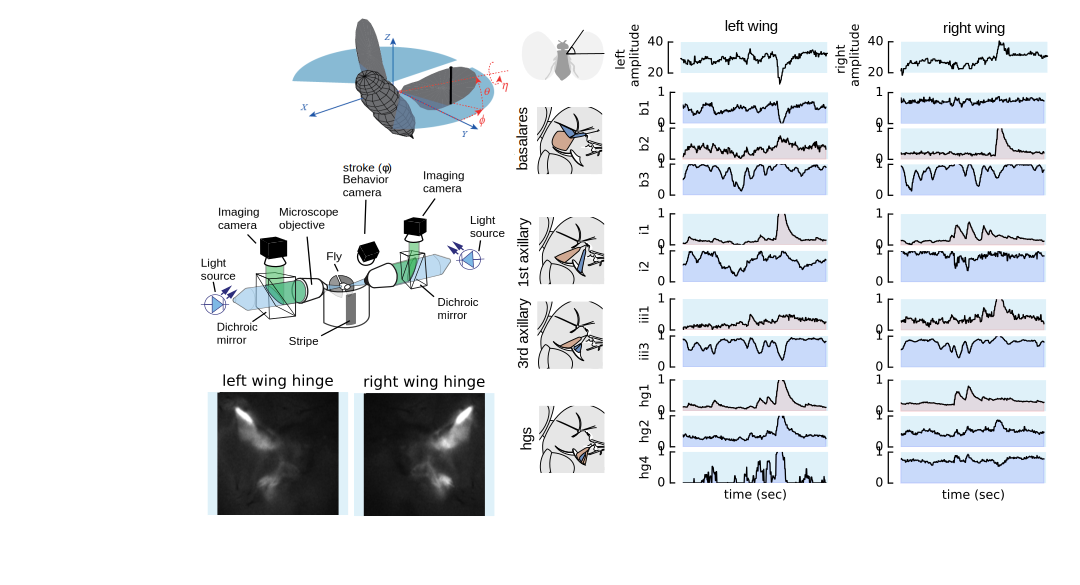

In [24]:

from matplotlib.animation import FuncAnimation

import figurefirst as fifi

layout = fifi.FigureLayout('paper_figure_1_v3.svg',make_mplfigures = True)

#layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['yaw_left'].fill_between(time, (mean_WBA-error), (mean_WBA + error),alpha = 0.1)

#layout.axes['yaw_right'].plot(time, mean_WBA_turn_right) #,'o',alpha = 0.2)
#layout.axes['yaw_right'].fill_between(time, (mean_WBA_turn_right-error_turn_right), (mean_WBA_turn_right + error_turn_right),alpha = 0.1)


fly = flylist[6]
snum = 1  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


###check normed signals method 


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]



fly_img = layout.axes['fly'].imshow(((fly.kine_cam_1[idxs[350]][:,:450].T[:,::-1])**.75),cmap = plt.cm.gray)  #,cmap = plt.cm.gray)**1.19
#arena_img = layout.axes['arena'].imshow(util.jpg2np(fly.arena_cam_1[idxs[0]])[:,150:650])
#ca_l_img = layout.axes['cam_l'].imshow(fly.ca_cam_left[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
#ca_r_img = layout.axes['cam_r'].imshow(fly.ca_cam_right[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['fly'].patch.set_alpha(0.0)
ca_l_img = layout.axes['l_wing'].imshow((fly.ca_cam_left[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['l_wing'].patch.set_alpha(0.0)
ca_r_img = layout.axes['r_wing'].imshow((fly.ca_cam_right[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['r_wing'].patch.set_alpha(0.0)

#layout.axes['cam_l'].set_title('left hinge')
#layout.axes['cam_r'].set_title('right hinge')
layout.axes['l_wing'].set_title('left wing hinge')
layout.axes['r_wing'].set_title('right wing hinge')

#layout.axes['arena_position'].plot(times,x,color = 'k',clip_on = False,lw = 1.5)
#layout.axes['arena_position'].set_xbound(0,times[-1])
#layout.axes['arena_position'].set_ybound(0,360)
#layout.axes['arena_position'].set_yticks([0,180,360])
#layout.axes['arena_position'].set_ylabel('arena \n orientation')
#layout.axes['arena_position'].patch.set_alpha(0.0)

#layout.axes['lmr'].plot(times,lmr,clip_on = False,color = 'k')
#layout.axes['lmr'].set_xbound(0,times[-1])
#layout.axes['lmr'].set_ylabel('left - right \n amplitude')
#layout.axes['lmr'].set_ybound(-15,15)
#layout.axes['lmr'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['l_wsa'].plot(times,l_deg,clip_on = False,color = 'k')
layout.axes['l_wsa'].set_xbound(0,times[-1])
layout.axes['l_wsa'].set_ylabel('left \n amplitude')
layout.axes['l_wsa'].patch.set_alpha(0.0)
layout.axes['l_wsa'].set_ybound(20,40)
layout.axes['l_wsa'].set_yticks([20, 40])
#layout.axes['l_wsa'].set_ybound(-15,15)
#layout.axes['l_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['r_wsa'].plot(times,r_deg,clip_on = False,color = 'k')
layout.axes['r_wsa'].set_xbound(0,times[-1])
layout.axes['r_wsa'].set_ylabel('right \n amplitude')
layout.axes['r_wsa'].patch.set_alpha(0.0)
layout.axes['r_wsa'].set_ybound(20,40)
layout.axes['r_wsa'].set_yticks([20, 40])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)







layout.axes['b1_l'].plot(times,b1l,color = 'k', lw = 1) 
layout.axes['b1_l'].fill_between(times, 0, b1l  , color = 'b', alpha = 0.1)
layout.axes['b1_l'].patch.set_alpha(0.0)
layout.axes['b1_l'].set_ybound(0,1.0)
layout.axes['b1_l'].set_yticks([0, 1.0])
layout.axes['b1_l'].set_ylabel('b1')
layout.axes['b1_r'].plot(times,b1r ,color = 'k', lw = 1)
layout.axes['b1_r'].fill_between(times, 0, b1r , color = 'b', alpha = 0.1)
layout.axes['b1_r'].patch.set_alpha(0.0)
layout.axes['b1_r'].set_ybound(0,1.0)
layout.axes['b1_r'].set_yticks([0, 1.0])

layout.axes['b2_l'].plot(times,b2l  ,color = 'k', lw = 1)
layout.axes['b2_l'].fill_between(times, 0, b2l , color = 'r', alpha = 0.1)
layout.axes['b2_l'].patch.set_alpha(0.0)
layout.axes['b2_l'].set_ybound(0,1.0)
layout.axes['b2_l'].set_yticks([0, 1])
layout.axes['b2_l'].set_ylabel('b2')
layout.axes['b2_r'].plot(times,b2r ,color = 'k', lw = 1)
layout.axes['b2_r'].fill_between(times, 0, b2r , color = 'r', alpha = 0.1)
layout.axes['b2_r'].patch.set_alpha(0.0)
layout.axes['b2_r'].set_ybound(0,1.0)
layout.axes['b2_r'].set_yticks([0, 1])

layout.axes['b3_l'].plot(times,b3l,color = 'k', lw = 1)
layout.axes['b3_l'].fill_between(times, 0, b3l , color = 'b', alpha = 0.1)
layout.axes['b3_l'].patch.set_alpha(0.0)
layout.axes['b3_l'].set_ybound(0,1.0)
layout.axes['b3_l'].set_yticks([0, 1])
layout.axes['b3_l'].set_ylabel('b3')
layout.axes['b3_r'].plot(times,b3r ,color = 'k', lw = 1)
layout.axes['b3_r'].fill_between(times, 0, b3r , color = 'b', alpha = 0.1)
layout.axes['b3_r'].patch.set_alpha(0.0)
layout.axes['b3_r'].set_ybound(0,1.0)
layout.axes['b3_r'].set_yticks([0, 1])


layout.axes['i1_l'].plot(times,i1l,color = 'k', lw = 1)
layout.axes['i1_l'].fill_between(times, 0, i1l , color = 'r', alpha = 0.1)
layout.axes['i1_l'].patch.set_alpha(0.0)
layout.axes['i1_l'].set_ybound(0,1.0)
layout.axes['i1_l'].set_yticks([0, 1])
layout.axes['i1_l'].set_ylabel('i1')
layout.axes['i1_r'].plot(times,i1r ,color = 'k', lw = 1)
layout.axes['i1_r'].fill_between(times, 0, i1r, color = 'r', alpha = 0.1)
layout.axes['i1_r'].patch.set_alpha(0.0)
layout.axes['i1_r'].set_ybound(0,1.0)
layout.axes['i1_r'].set_yticks([0, 1])

layout.axes['i2_l'].plot(times,i2l ,color = 'k', lw = 1)
layout.axes['i2_l'].fill_between(times, 0, i2l , color = 'b', alpha = 0.1)
layout.axes['i2_l'].patch.set_alpha(0.0)
layout.axes['i2_l'].set_ybound(0,1.0)
layout.axes['i2_l'].set_yticks([0, 1.0])
layout.axes['i2_l'].set_ylabel('i2')
layout.axes['i2_r'].plot(times,i2r ,color = 'k', lw = 1)
layout.axes['i2_r'].fill_between(times, 0, i2r, color = 'b', alpha = 0.1)
layout.axes['i2_r'].patch.set_alpha(0.0)
layout.axes['i2_r'].set_ybound(0,1.0)
layout.axes['i2_r'].set_yticks([0, 1.0])

layout.axes['iii1_l'].plot(times,iii1l,color = 'k', lw = 1)
layout.axes['iii1_l'].fill_between(times, 0, iii1l, color = 'r', alpha = 0.1)
layout.axes['iii1_l'].patch.set_alpha(0.0)
layout.axes['iii1_l'].set_ybound(0,1.0)
layout.axes['iii1_l'].set_yticks([0, 1])
layout.axes['iii1_l'].set_ylabel('iii1')
layout.axes['iii1_r'].plot(times,iii1r,color = 'k', lw = 1)
layout.axes['iii1_r'].fill_between(times, 0, iii1r, color = 'r', alpha = 0.1)
layout.axes['iii1_r'].patch.set_alpha(0.0)
layout.axes['iii1_r'].set_ybound(0,1.0)
layout.axes['iii1_r'].set_yticks([0, 1])

layout.axes['iii3_l'].plot(times,iii3l,color = 'k', lw = 1)
layout.axes['iii3_l'].fill_between(times, 0, iii3l, color = 'b', alpha = 0.1)
layout.axes['iii3_l'].patch.set_alpha(0.0)
layout.axes['iii3_l'].set_ybound(0,1.0)
layout.axes['iii3_l'].set_yticks([0, 1])
layout.axes['iii3_l'].set_ylabel('iii3')
layout.axes['iii3_r'].plot(times,iii3r,color = 'k', lw = 1)
layout.axes['iii3_r'].fill_between(times, 0, iii3r, color = 'b', alpha = 0.1)
layout.axes['iii3_r'].patch.set_alpha(0.0)
layout.axes['iii3_r'].set_ybound(0,1.0)
layout.axes['iii3_r'].set_yticks([0, 1])

layout.axes['hg1_l'].plot(times,hg1l,color = 'k', lw = 1)
layout.axes['hg1_l'].fill_between(times, 0, hg1l, color = 'r', alpha = 0.1)
layout.axes['hg1_l'].patch.set_alpha(0.0)
layout.axes['hg1_l'].set_ybound(0,1.0)
layout.axes['hg1_l'].set_yticks([0, 1])
layout.axes['hg1_l'].set_ylabel('hg1')
layout.axes['hg1_r'].plot(times,hg1r,color = 'k', lw = 1)
layout.axes['hg1_r'].fill_between(times, 0, hg1r, color = 'r', alpha = 0.1)
layout.axes['hg1_r'].patch.set_alpha(0.0)
layout.axes['hg1_r'].set_ybound(0,1.0)
layout.axes['hg1_r'].set_yticks([0, 1])

layout.axes['hg2_l'].plot(times,hg2l,color = 'k', lw = 1)
layout.axes['hg2_l'].fill_between(times, 0, hg2l, color = 'b', alpha = 0.1)
layout.axes['hg2_l'].patch.set_alpha(0.0)
layout.axes['hg2_l'].set_ybound(0,1.0)
layout.axes['hg2_l'].set_yticks([0, 1])
layout.axes['hg2_l'].set_ylabel('hg2')
layout.axes['hg2_r'].plot(times,hg2r,color = 'k', lw = 1)
layout.axes['hg2_r'].fill_between(times, 0, hg2r, color = 'b', alpha = 0.1)
layout.axes['hg2_r'].patch.set_alpha(0.0)
layout.axes['hg2_r'].set_ybound(0,1.0)
layout.axes['hg2_r'].set_yticks([0, 1])


#layout.axes['hg3_l'].plot(times,hg3l,color = 'k', lw = 1)
#layout.axes['hg3_l'].fill_between(times, 0, hg3l, color = 'b', alpha = 0.1)
#layout.axes['hg3_l'].patch.set_alpha(0.0)
#layout.axes['hg3_l'].set_ybound(0,1.0)
#layout.axes['hg3_l'].set_yticks([0, 0.5, 1])
#layout.axes['hg3_l'].set_ylabel('hg3')
#layout.axes['hg3_r'].plot(times,hg3r,color = 'k', lw = 1)
#layout.axes['hg3_r'].fill_between(times, 0, hg3r, color = 'b', alpha = 0.1)
#layout.axes['hg3_r'].patch.set_alpha(0.0)
#layout.axes['hg3_r'].set_ybound(0,1.0)
#layout.axes['hg3_r'].set_yticks([0, 0.5, 1])

layout.axes['hg4_l'].plot(times,hg4l,color = 'k', lw = 1)
layout.axes['hg4_l'].fill_between(times, 0, hg4l, color = 'b', alpha = 0.1)
layout.axes['hg4_l'].patch.set_alpha(0.0)
layout.axes['hg4_l'].set_ybound(0,1.0)
layout.axes['hg4_l'].set_yticks([0, 1])
layout.axes['hg4_l'].set_ylabel('hg4')
layout.axes['hg4_l'].set_xticks([0, 2, 4, 8])
layout.axes['hg4_l'].set_xlabel('time (sec)')
layout.axes['hg4_r'].plot(times,hg4r,color = 'k', lw = 1)
layout.axes['hg4_r'].fill_between(times, 0, hg4r, color = 'b', alpha = 0.1)
layout.axes['hg4_r'].patch.set_alpha(0.0)
layout.axes['hg4_r'].set_ybound(0,1.0)
layout.axes['hg4_r'].set_yticks([0, 1])
layout.axes['hg4_r'].set_xticks([0, 2, 4, 8])
layout.axes['hg4_r'].set_xlabel('time (sec)')


#layout.axes['bias', 'arena_pos'].set_xbound(0,times[-1])
#layout.axes['bias', 'arena_pos'].set_ybound(0,360)
#layout.axes['bias', 'arena_pos'].set_yticks([0,180,360])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

#layout.axes['bias', 'lmr'].plot(times,lmr,clip_on = False,color = 'k', lw = 2)
#layout.axes['bias', 'lmr'].set_xbound(0,times[-1])
#layout.axes['bias', 'lmr'].set_ybound(-15,15)
#layout.axes['bias', 'lmr'].set_yticks([-15,0,15])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

'''
## maybe use this min subtraction###

layout.axes['bias', 'i1'].plot(times,i1l - np.min(i1l), lw = 2)
layout.axes['bias', 'i1'].plot(times,i1r - np.min(i1r), lw = 2)
layout.axes['bias', 'i1'].set_ybound(0,5)
'''


#layout.axes['bias', 'iii3'].plot(times,iii3l - np.min(iii3l), lw = 2)
#layout.axes['bias', 'iii3'].plot(times,iii3r - np.min(iii3r), lw = 2)
#layout.axes['bias', 'iii3'].set_ybound(0,5)














#layout.axes['axvline'].patch.set_alpha(0.0)
#layout.axes['axvline'].set_xbound(0,times[-1])
#fifi.mpl_functions.set_spines(layout)

#indicator = layout.axes['axvline'].axvline(0,color = 'k')

#def update(frame):
#    fly_img.set_data(fly.kine_cam_1[idxs[frame]][:,:450].T[:,::-1]**1.19)
#    #arena_img.set_data(util.jpg2np(fly.arena_cam_1[idxs[frame]])[:,150:650])
#    ca_l_img.set_data(fly.ca_cam_left[idxs[frame]][:,25:-25]**1.25)
#    ca_r_img.set_data(fly.ca_cam_right[idxs[frame]][:,25:-25]**1.25)
#    indicator.set_xdata(times[frame])

#update(0)
plt.draw()

#from matplotlib.animation import FFMpegWriter 
#Writer = FFMpegWriter 
#writer = FFMpegWriter(fps=30, metadata=dict(artist='Alysha de Souza'), 
#                      extra_args=['-vcodec', 'h264', '-pix_fmt','yuv420p'])
#ani = FuncAnimation(plt.gcf(), update, frames=np.arange(0,375))
#ani.save('cl_movie.mp4',writer = writer)




'''
include muscle maps and ROI
'''



fifi.mpl_functions.set_spines(layout)
layout.save('figure_1_v_recent_changes_5p.svg')
plt.close('all')
display(SVG('figure_1_v_recent_changes_5p.svg'))

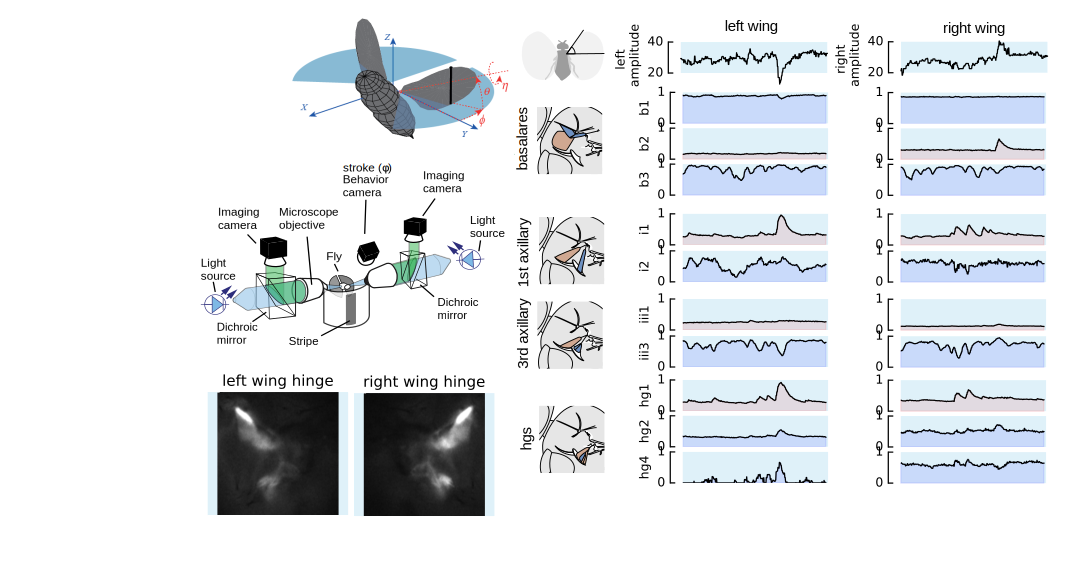

In [18]:

from matplotlib.animation import FuncAnimation

import figurefirst as fifi

layout = fifi.FigureLayout('paper_figure_1_v3.svg',make_mplfigures = True)

#layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['yaw_left'].fill_between(time, (mean_WBA-error), (mean_WBA + error),alpha = 0.1)

#layout.axes['yaw_right'].plot(time, mean_WBA_turn_right) #,'o',alpha = 0.2)
#layout.axes['yaw_right'].fill_between(time, (mean_WBA_turn_right-error_turn_right), (mean_WBA_turn_right + error_turn_right),alpha = 0.1)


fly = flylist[6]
snum = 1  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


###check normed signals method 


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]



fly_img = layout.axes['fly'].imshow(((fly.kine_cam_1[idxs[350]][:,:450].T[:,::-1])**.75),cmap = plt.cm.gray)  #,cmap = plt.cm.gray)**1.19
#arena_img = layout.axes['arena'].imshow(util.jpg2np(fly.arena_cam_1[idxs[0]])[:,150:650])
#ca_l_img = layout.axes['cam_l'].imshow(fly.ca_cam_left[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
#ca_r_img = layout.axes['cam_r'].imshow(fly.ca_cam_right[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['fly'].patch.set_alpha(0.0)
ca_l_img = layout.axes['l_wing'].imshow((fly.ca_cam_left[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['l_wing'].patch.set_alpha(0.0)
ca_r_img = layout.axes['r_wing'].imshow((fly.ca_cam_right[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['r_wing'].patch.set_alpha(0.0)

#layout.axes['cam_l'].set_title('left hinge')
#layout.axes['cam_r'].set_title('right hinge')
layout.axes['l_wing'].set_title('left wing hinge')
layout.axes['r_wing'].set_title('right wing hinge')

#layout.axes['arena_position'].plot(times,x,color = 'k',clip_on = False,lw = 1.5)
#layout.axes['arena_position'].set_xbound(0,times[-1])
#layout.axes['arena_position'].set_ybound(0,360)
#layout.axes['arena_position'].set_yticks([0,180,360])
#layout.axes['arena_position'].set_ylabel('arena \n orientation')
#layout.axes['arena_position'].patch.set_alpha(0.0)

#layout.axes['lmr'].plot(times,lmr,clip_on = False,color = 'k')
#layout.axes['lmr'].set_xbound(0,times[-1])
#layout.axes['lmr'].set_ylabel('left - right \n amplitude')
#layout.axes['lmr'].set_ybound(-15,15)
#layout.axes['lmr'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['l_wsa'].plot(times,l_deg,clip_on = False,color = 'k')
layout.axes['l_wsa'].set_xbound(0,times[-1])
layout.axes['l_wsa'].set_ylabel('left \n amplitude')
layout.axes['l_wsa'].patch.set_alpha(0.0)
layout.axes['l_wsa'].set_ybound(20,40)
layout.axes['l_wsa'].set_yticks([20, 40])
#layout.axes['l_wsa'].set_ybound(-15,15)
#layout.axes['l_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['r_wsa'].plot(times,r_deg,clip_on = False,color = 'k')
layout.axes['r_wsa'].set_xbound(0,times[-1])
layout.axes['r_wsa'].set_ylabel('right \n amplitude')
layout.axes['r_wsa'].patch.set_alpha(0.0)
layout.axes['r_wsa'].set_ybound(20,40)
layout.axes['r_wsa'].set_yticks([20, 40])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)







layout.axes['b1_l'].plot(times,b1l,color = 'k', lw = 1) 
layout.axes['b1_l'].fill_between(times, 0, b1l  , color = 'b', alpha = 0.1)
layout.axes['b1_l'].patch.set_alpha(0.0)
layout.axes['b1_l'].set_ybound(0,1.0)
layout.axes['b1_l'].set_yticks([0, 1.0])
layout.axes['b1_l'].set_ylabel('b1')
layout.axes['b1_r'].plot(times,b1r ,color = 'k', lw = 1)
layout.axes['b1_r'].fill_between(times, 0, b1r , color = 'b', alpha = 0.1)
layout.axes['b1_r'].patch.set_alpha(0.0)
layout.axes['b1_r'].set_ybound(0,1.0)
layout.axes['b1_r'].set_yticks([0, 1.0])

layout.axes['b2_l'].plot(times,b2l  ,color = 'k', lw = 1)
layout.axes['b2_l'].fill_between(times, 0, b2l , color = 'r', alpha = 0.1)
layout.axes['b2_l'].patch.set_alpha(0.0)
layout.axes['b2_l'].set_ybound(0,1.0)
layout.axes['b2_l'].set_yticks([0, 1])
layout.axes['b2_l'].set_ylabel('b2')
layout.axes['b2_r'].plot(times,b2r ,color = 'k', lw = 1)
layout.axes['b2_r'].fill_between(times, 0, b2r , color = 'r', alpha = 0.1)
layout.axes['b2_r'].patch.set_alpha(0.0)
layout.axes['b2_r'].set_ybound(0,1.0)
layout.axes['b2_r'].set_yticks([0, 1])

layout.axes['b3_l'].plot(times,b3l,color = 'k', lw = 1)
layout.axes['b3_l'].fill_between(times, 0, b3l , color = 'b', alpha = 0.1)
layout.axes['b3_l'].patch.set_alpha(0.0)
layout.axes['b3_l'].set_ybound(0,1.0)
layout.axes['b3_l'].set_yticks([0, 1])
layout.axes['b3_l'].set_ylabel('b3')
layout.axes['b3_r'].plot(times,b3r ,color = 'k', lw = 1)
layout.axes['b3_r'].fill_between(times, 0, b3r , color = 'b', alpha = 0.1)
layout.axes['b3_r'].patch.set_alpha(0.0)
layout.axes['b3_r'].set_ybound(0,1.0)
layout.axes['b3_r'].set_yticks([0, 1])


layout.axes['i1_l'].plot(times,i1l,color = 'k', lw = 1)
layout.axes['i1_l'].fill_between(times, 0, i1l , color = 'r', alpha = 0.1)
layout.axes['i1_l'].patch.set_alpha(0.0)
layout.axes['i1_l'].set_ybound(0,1.0)
layout.axes['i1_l'].set_yticks([0, 1])
layout.axes['i1_l'].set_ylabel('i1')
layout.axes['i1_r'].plot(times,i1r ,color = 'k', lw = 1)
layout.axes['i1_r'].fill_between(times, 0, i1r, color = 'r', alpha = 0.1)
layout.axes['i1_r'].patch.set_alpha(0.0)
layout.axes['i1_r'].set_ybound(0,1.0)
layout.axes['i1_r'].set_yticks([0, 1])

layout.axes['i2_l'].plot(times,i2l ,color = 'k', lw = 1)
layout.axes['i2_l'].fill_between(times, 0, i2l , color = 'b', alpha = 0.1)
layout.axes['i2_l'].patch.set_alpha(0.0)
layout.axes['i2_l'].set_ybound(0,1.0)
layout.axes['i2_l'].set_yticks([0, 1.0])
layout.axes['i2_l'].set_ylabel('i2')
layout.axes['i2_r'].plot(times,i2r ,color = 'k', lw = 1)
layout.axes['i2_r'].fill_between(times, 0, i2r, color = 'b', alpha = 0.1)
layout.axes['i2_r'].patch.set_alpha(0.0)
layout.axes['i2_r'].set_ybound(0,1.0)
layout.axes['i2_r'].set_yticks([0, 1.0])

layout.axes['iii1_l'].plot(times,iii1l,color = 'k', lw = 1)
layout.axes['iii1_l'].fill_between(times, 0, iii1l, color = 'r', alpha = 0.1)
layout.axes['iii1_l'].patch.set_alpha(0.0)
layout.axes['iii1_l'].set_ybound(0,1.0)
layout.axes['iii1_l'].set_yticks([0, 1])
layout.axes['iii1_l'].set_ylabel('iii1')
layout.axes['iii1_r'].plot(times,iii1r,color = 'k', lw = 1)
layout.axes['iii1_r'].fill_between(times, 0, iii1r, color = 'r', alpha = 0.1)
layout.axes['iii1_r'].patch.set_alpha(0.0)
layout.axes['iii1_r'].set_ybound(0,1.0)
layout.axes['iii1_r'].set_yticks([0, 1])

layout.axes['iii3_l'].plot(times,iii3l,color = 'k', lw = 1)
layout.axes['iii3_l'].fill_between(times, 0, iii3l, color = 'b', alpha = 0.1)
layout.axes['iii3_l'].patch.set_alpha(0.0)
layout.axes['iii3_l'].set_ybound(0,1.0)
layout.axes['iii3_l'].set_yticks([0, 1])
layout.axes['iii3_l'].set_ylabel('iii3')
layout.axes['iii3_r'].plot(times,iii3r,color = 'k', lw = 1)
layout.axes['iii3_r'].fill_between(times, 0, iii3r, color = 'b', alpha = 0.1)
layout.axes['iii3_r'].patch.set_alpha(0.0)
layout.axes['iii3_r'].set_ybound(0,1.0)
layout.axes['iii3_r'].set_yticks([0, 1])

layout.axes['hg1_l'].plot(times,hg1l,color = 'k', lw = 1)
layout.axes['hg1_l'].fill_between(times, 0, hg1l, color = 'r', alpha = 0.1)
layout.axes['hg1_l'].patch.set_alpha(0.0)
layout.axes['hg1_l'].set_ybound(0,1.0)
layout.axes['hg1_l'].set_yticks([0, 1])
layout.axes['hg1_l'].set_ylabel('hg1')
layout.axes['hg1_r'].plot(times,hg1r,color = 'k', lw = 1)
layout.axes['hg1_r'].fill_between(times, 0, hg1r, color = 'r', alpha = 0.1)
layout.axes['hg1_r'].patch.set_alpha(0.0)
layout.axes['hg1_r'].set_ybound(0,1.0)
layout.axes['hg1_r'].set_yticks([0, 1])

layout.axes['hg2_l'].plot(times,hg2l,color = 'k', lw = 1)
layout.axes['hg2_l'].fill_between(times, 0, hg2l, color = 'b', alpha = 0.1)
layout.axes['hg2_l'].patch.set_alpha(0.0)
layout.axes['hg2_l'].set_ybound(0,1.0)
layout.axes['hg2_l'].set_yticks([0, 1])
layout.axes['hg2_l'].set_ylabel('hg2')
layout.axes['hg2_r'].plot(times,hg2r,color = 'k', lw = 1)
layout.axes['hg2_r'].fill_between(times, 0, hg2r, color = 'b', alpha = 0.1)
layout.axes['hg2_r'].patch.set_alpha(0.0)
layout.axes['hg2_r'].set_ybound(0,1.0)
layout.axes['hg2_r'].set_yticks([0, 1])


#layout.axes['hg3_l'].plot(times,hg3l,color = 'k', lw = 1)
#layout.axes['hg3_l'].fill_between(times, 0, hg3l, color = 'b', alpha = 0.1)
#layout.axes['hg3_l'].patch.set_alpha(0.0)
#layout.axes['hg3_l'].set_ybound(0,1.0)
#layout.axes['hg3_l'].set_yticks([0, 0.5, 1])
#layout.axes['hg3_l'].set_ylabel('hg3')
#layout.axes['hg3_r'].plot(times,hg3r,color = 'k', lw = 1)
#layout.axes['hg3_r'].fill_between(times, 0, hg3r, color = 'b', alpha = 0.1)
#layout.axes['hg3_r'].patch.set_alpha(0.0)
#layout.axes['hg3_r'].set_ybound(0,1.0)
#layout.axes['hg3_r'].set_yticks([0, 0.5, 1])

layout.axes['hg4_l'].plot(times,hg4l,color = 'k', lw = 1)
layout.axes['hg4_l'].fill_between(times, 0, hg4l, color = 'b', alpha = 0.1)
layout.axes['hg4_l'].patch.set_alpha(0.0)
layout.axes['hg4_l'].set_ybound(0,1.0)
layout.axes['hg4_l'].set_yticks([0, 1])
layout.axes['hg4_l'].set_ylabel('hg4')
layout.axes['hg4_r'].plot(times,hg4r,color = 'k', lw = 1)
layout.axes['hg4_r'].fill_between(times, 0, hg4r, color = 'b', alpha = 0.1)
layout.axes['hg4_r'].patch.set_alpha(0.0)
layout.axes['hg4_r'].set_ybound(0,1.0)
layout.axes['hg4_r'].set_yticks([0, 1])



#layout.axes['bias', 'arena_pos'].set_xbound(0,times[-1])
#layout.axes['bias', 'arena_pos'].set_ybound(0,360)
#layout.axes['bias', 'arena_pos'].set_yticks([0,180,360])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

#layout.axes['bias', 'lmr'].plot(times,lmr,clip_on = False,color = 'k', lw = 2)
#layout.axes['bias', 'lmr'].set_xbound(0,times[-1])
#layout.axes['bias', 'lmr'].set_ybound(-15,15)
#layout.axes['bias', 'lmr'].set_yticks([-15,0,15])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

'''
## maybe use this min subtraction###

layout.axes['bias', 'i1'].plot(times,i1l - np.min(i1l), lw = 2)
layout.axes['bias', 'i1'].plot(times,i1r - np.min(i1r), lw = 2)
layout.axes['bias', 'i1'].set_ybound(0,5)
'''


#layout.axes['bias', 'iii3'].plot(times,iii3l - np.min(iii3l), lw = 2)
#layout.axes['bias', 'iii3'].plot(times,iii3r - np.min(iii3r), lw = 2)
#layout.axes['bias', 'iii3'].set_ybound(0,5)














#layout.axes['axvline'].patch.set_alpha(0.0)
#layout.axes['axvline'].set_xbound(0,times[-1])
#fifi.mpl_functions.set_spines(layout)

#indicator = layout.axes['axvline'].axvline(0,color = 'k')

#def update(frame):
#    fly_img.set_data(fly.kine_cam_1[idxs[frame]][:,:450].T[:,::-1]**1.19)
#    #arena_img.set_data(util.jpg2np(fly.arena_cam_1[idxs[frame]])[:,150:650])
#    ca_l_img.set_data(fly.ca_cam_left[idxs[frame]][:,25:-25]**1.25)
#    ca_r_img.set_data(fly.ca_cam_right[idxs[frame]][:,25:-25]**1.25)
#    indicator.set_xdata(times[frame])

#update(0)
plt.draw()

#from matplotlib.animation import FFMpegWriter 
#Writer = FFMpegWriter 
#writer = FFMpegWriter(fps=30, metadata=dict(artist='Alysha de Souza'), 
#                      extra_args=['-vcodec', 'h264', '-pix_fmt','yuv420p'])
#ani = FuncAnimation(plt.gcf(), update, frames=np.arange(0,375))
#ani.save('cl_movie.mp4',writer = writer)




'''
include muscle maps and ROI
'''



fifi.mpl_functions.set_spines(layout)
layout.save('figure_1_v6.svg')
plt.close('all')
display(SVG('figure_1_v6.svg'))

('5th percentile:   ', -2.1040292322399248)
('95th percentile:   ', 0.67210801782370733)
('5th percentile:   ', -2.114957933455476)
('95th percentile:   ', 0.71043574697114953)
('5th percentile:   ', -1.5438563569958617)
('95th percentile:   ', 0.54098968380950618)
('5th percentile:   ', -1.1680481797686224)
('95th percentile:   ', 0.20316766558132426)
('5th percentile:   ', -2.7719574712737756)
('95th percentile:   ', 0.60683312155938118)
('5th percentile:   ', -2.8361888037713259)
('95th percentile:   ', 0.6300094433452248)
('5th percentile:   ', -0.7229477647528727)
('95th percentile:   ', -0.015431566172808168)
('5th percentile:   ', -0.82431886069961235)
('95th percentile:   ', -0.049138357923204014)
('5th percentile:   ', -0.6464473029700234)
('95th percentile:   ', 0.43142052103323691)
('5th percentile:   ', -1.2749702772306222)
('95th percentile:   ', 0.79811880666787205)
('5th percentile:   ', -1.5030635495600462)
('95th percentile:   ', 0.48265090722406939)
('5th percentile: 

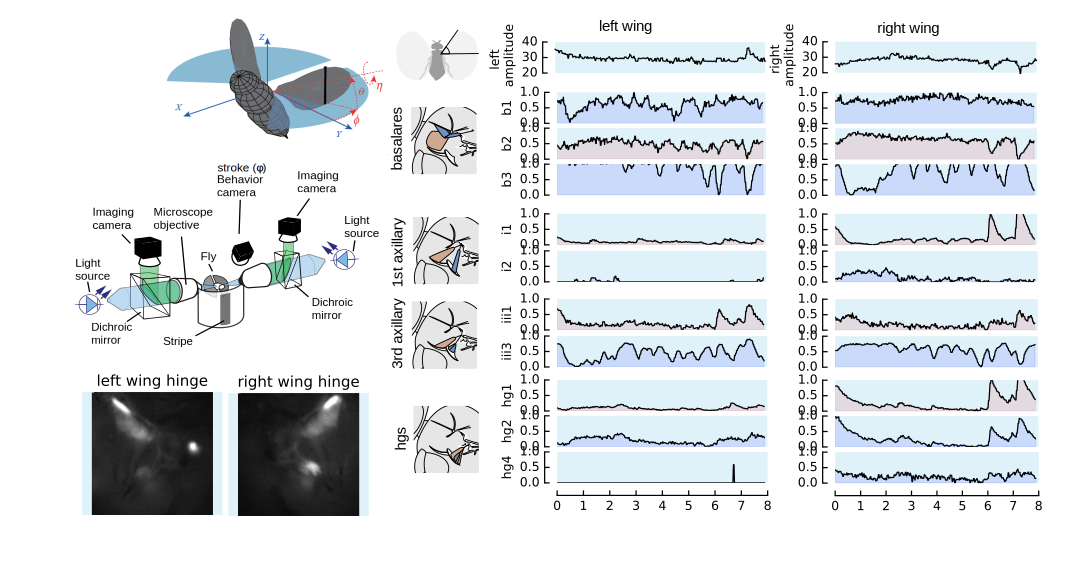

In [19]:

from matplotlib.animation import FuncAnimation

import figurefirst as fifi

layout = fifi.FigureLayout('paper_figure_1_v4.svg',make_mplfigures = True)

#layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['yaw_left'].fill_between(time, (mean_WBA-error), (mean_WBA + error),alpha = 0.1)

#layout.axes['yaw_right'].plot(time, mean_WBA_turn_right) #,'o',alpha = 0.2)
#layout.axes['yaw_right'].fill_between(time, (mean_WBA_turn_right-error_turn_right), (mean_WBA_turn_right + error_turn_right),alpha = 0.1)


fly = flylist[3]
snum = 4  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


###check normed signals method 


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]



fly_img = layout.axes['fly'].imshow(((fly.kine_cam_1[idxs[350]][:,:450].T[:,::-1])**.75),cmap = plt.cm.gray)  #,cmap = plt.cm.gray)**1.19
#arena_img = layout.axes['arena'].imshow(util.jpg2np(fly.arena_cam_1[idxs[0]])[:,150:650])
#ca_l_img = layout.axes['cam_l'].imshow(fly.ca_cam_left[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
#ca_r_img = layout.axes['cam_r'].imshow(fly.ca_cam_right[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['fly'].patch.set_alpha(0.0)
ca_l_img = layout.axes['l_wing'].imshow((fly.ca_cam_left[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['l_wing'].patch.set_alpha(0.0)
ca_r_img = layout.axes['r_wing'].imshow((fly.ca_cam_right[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['r_wing'].patch.set_alpha(0.0)

#layout.axes['cam_l'].set_title('left hinge')
#layout.axes['cam_r'].set_title('right hinge')
layout.axes['l_wing'].set_title('left wing hinge')
layout.axes['r_wing'].set_title('right wing hinge')

#layout.axes['arena_position'].plot(times,x,color = 'k',clip_on = False,lw = 1.5)
#layout.axes['arena_position'].set_xbound(0,times[-1])
#layout.axes['arena_position'].set_ybound(0,360)
#layout.axes['arena_position'].set_yticks([0,180,360])
#layout.axes['arena_position'].set_ylabel('arena \n orientation')
#layout.axes['arena_position'].patch.set_alpha(0.0)

#layout.axes['lmr'].plot(times,lmr,clip_on = False,color = 'k')
#layout.axes['lmr'].set_xbound(0,times[-1])
#layout.axes['lmr'].set_ylabel('left - right \n amplitude')
#layout.axes['lmr'].set_ybound(-15,15)
#layout.axes['lmr'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['l_wsa'].plot(times,l_deg,clip_on = False,color = 'k')
layout.axes['l_wsa'].set_xbound(0,times[-1])
layout.axes['l_wsa'].set_ylabel('left \n amplitude')
layout.axes['l_wsa'].patch.set_alpha(0.0)
layout.axes['l_wsa'].set_ybound(20,40)
layout.axes['l_wsa'].set_yticks([20, 30, 40])
#layout.axes['l_wsa'].set_ybound(-15,15)
#layout.axes['l_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['r_wsa'].plot(times,r_deg,clip_on = False,color = 'k')
layout.axes['r_wsa'].set_xbound(0,times[-1])
layout.axes['r_wsa'].set_ylabel('right \n amplitude')
layout.axes['r_wsa'].patch.set_alpha(0.0)
layout.axes['r_wsa'].set_ybound(20,40)
layout.axes['r_wsa'].set_yticks([20, 30, 40])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)







layout.axes['b1_l'].plot(times,b1l,color = 'k', lw = 1) 
layout.axes['b1_l'].fill_between(times, 0, b1l , color = 'b', alpha = 0.1)
layout.axes['b1_l'].patch.set_alpha(0.0)
layout.axes['b1_l'].set_ybound(0,1.0)
layout.axes['b1_l'].set_yticks([0, 0.5, 1.0])
layout.axes['b1_l'].set_ylabel('b1')
layout.axes['b1_r'].plot(times,b1r ,color = 'k', lw = 1)
layout.axes['b1_r'].fill_between(times, 0, b1r , color = 'b', alpha = 0.1)
layout.axes['b1_r'].patch.set_alpha(0.0)
layout.axes['b1_r'].set_ybound(0,1.0)
layout.axes['b1_r'].set_yticks([0, 0.5, 1.0])

layout.axes['b2_l'].plot(times,b2l -np.min(b2l) ,color = 'k', lw = 1)
layout.axes['b2_l'].fill_between(times, 0, b2l -np.min(b2l) , color = 'r', alpha = 0.1)
layout.axes['b2_l'].patch.set_alpha(0.0)
layout.axes['b2_l'].set_ybound(0,1.0)
layout.axes['b2_l'].set_yticks([0, 0.5, 1])
layout.axes['b2_l'].set_ylabel('b2')
layout.axes['b2_r'].plot(times,b2r -np.min(b2r),color = 'k', lw = 1)
layout.axes['b2_r'].fill_between(times, 0, b2r -np.min(b2r), color = 'r', alpha = 0.1)
layout.axes['b2_r'].patch.set_alpha(0.0)
layout.axes['b2_r'].set_ybound(0,1.0)
layout.axes['b2_r'].set_yticks([0, 0.5, 1])

layout.axes['b3_l'].plot(times,b3l -np.min(b3l),color = 'k', lw = 1)
layout.axes['b3_l'].fill_between(times, 0, b3l -np.min(b3l), color = 'b', alpha = 0.1)
layout.axes['b3_l'].patch.set_alpha(0.0)
layout.axes['b3_l'].set_ybound(0,1.0)
layout.axes['b3_l'].set_yticks([0, 0.5, 1])
layout.axes['b3_l'].set_ylabel('b3')
layout.axes['b3_r'].plot(times,b3r -np.min(b3r),color = 'k', lw = 1)
layout.axes['b3_r'].fill_between(times, 0, b3r - np.min(b3r), color = 'b', alpha = 0.1)
layout.axes['b3_r'].patch.set_alpha(0.0)
layout.axes['b3_r'].set_ybound(0,1.0)
layout.axes['b3_r'].set_yticks([0, 0.5, 1])


layout.axes['i1_l'].plot(times,i1l-np.min(i1l),color = 'k', lw = 1)
layout.axes['i1_l'].fill_between(times, 0, i1l -np.min(i1l), color = 'r', alpha = 0.1)
layout.axes['i1_l'].patch.set_alpha(0.0)
layout.axes['i1_l'].set_ybound(0,1.0)
layout.axes['i1_l'].set_yticks([0, 0.5, 1])
layout.axes['i1_l'].set_ylabel('i1')
layout.axes['i1_r'].plot(times,i1r -np.min(i1r),color = 'k', lw = 1)
layout.axes['i1_r'].fill_between(times, 0, i1r-np.min(i1r), color = 'r', alpha = 0.1)
layout.axes['i1_r'].patch.set_alpha(0.0)
layout.axes['i1_r'].set_ybound(0,1.0)
layout.axes['i1_r'].set_yticks([0, 0.5, 1])

layout.axes['i2_l'].plot(times,i2l -np.min(i2l),color = 'k', lw = 1)
layout.axes['i2_l'].fill_between(times, 0, i2l -np.min(i2l), color = 'b', alpha = 0.1)
layout.axes['i2_l'].patch.set_alpha(0.0)
layout.axes['i2_l'].set_ybound(0,1.0)
layout.axes['i2_l'].set_yticks([0, 0.5, 1.0])
layout.axes['i2_l'].set_ylabel('i2')
layout.axes['i2_r'].plot(times,i2r -np.min(i2r),color = 'k', lw = 1)
layout.axes['i2_r'].fill_between(times, 0, i2r -np.min(i2r), color = 'b', alpha = 0.1)
layout.axes['i2_r'].patch.set_alpha(0.0)
layout.axes['i2_r'].set_ybound(0,1.0)
layout.axes['i2_r'].set_yticks([0, 0.5, 1.0])

layout.axes['iii1_l'].plot(times,iii1l-np.min(iii1l),color = 'k', lw = 1)
layout.axes['iii1_l'].fill_between(times, 0, iii1l-np.min(iii1l), color = 'r', alpha = 0.1)
layout.axes['iii1_l'].patch.set_alpha(0.0)
layout.axes['iii1_l'].set_ybound(0,1.0)
layout.axes['iii1_l'].set_yticks([0, 0.5, 1])
layout.axes['iii1_l'].set_ylabel('iii1')
layout.axes['iii1_r'].plot(times,iii1r-np.min(iii1r),color = 'k', lw = 1)
layout.axes['iii1_r'].fill_between(times, 0, iii1r-np.min(iii1r), color = 'r', alpha = 0.1)
layout.axes['iii1_r'].patch.set_alpha(0.0)
layout.axes['iii1_r'].set_ybound(0,1.0)
layout.axes['iii1_r'].set_yticks([0, 0.5, 1])

layout.axes['iii3_l'].plot(times,iii3l-np.min(iii3l),color = 'k', lw = 1)
layout.axes['iii3_l'].fill_between(times, 0, iii3l-np.min(iii3l), color = 'b', alpha = 0.1)
layout.axes['iii3_l'].patch.set_alpha(0.0)
layout.axes['iii3_l'].set_ybound(0,1.0)
layout.axes['iii3_l'].set_yticks([0, 0.5, 1])
layout.axes['iii3_l'].set_ylabel('iii3')
layout.axes['iii3_r'].plot(times,iii3r-np.min(iii3r),color = 'k', lw = 1)
layout.axes['iii3_r'].fill_between(times, 0, iii3r-np.min(iii3r), color = 'b', alpha = 0.1)
layout.axes['iii3_r'].patch.set_alpha(0.0)
layout.axes['iii3_r'].set_ybound(0,1.0)
layout.axes['iii3_r'].set_yticks([0, 0.5, 1])

layout.axes['hg1_l'].plot(times,hg1l-np.min(hg1l),color = 'k', lw = 1)
layout.axes['hg1_l'].fill_between(times, 0, hg1l-np.min(hg1l), color = 'r', alpha = 0.1)
layout.axes['hg1_l'].patch.set_alpha(0.0)
layout.axes['hg1_l'].set_ybound(0,1.0)
layout.axes['hg1_l'].set_yticks([0, 0.5, 1])
layout.axes['hg1_l'].set_ylabel('hg1')
layout.axes['hg1_r'].plot(times,hg1r-np.min(hg1r),color = 'k', lw = 1)
layout.axes['hg1_r'].fill_between(times, 0, hg1r-np.min(hg1r), color = 'r', alpha = 0.1)
layout.axes['hg1_r'].patch.set_alpha(0.0)
layout.axes['hg1_r'].set_ybound(0,1.0)
layout.axes['hg1_r'].set_yticks([0, 0.5, 1])

layout.axes['hg2_l'].plot(times,hg2l-np.min(hg2l),color = 'k', lw = 1)
layout.axes['hg2_l'].fill_between(times, 0, hg2l-np.min(hg2l), color = 'b', alpha = 0.1)
layout.axes['hg2_l'].patch.set_alpha(0.0)
layout.axes['hg2_l'].set_ybound(0,1.0)
layout.axes['hg2_l'].set_yticks([0, 0.5, 1])
layout.axes['hg2_l'].set_ylabel('hg2')
layout.axes['hg2_r'].plot(times,hg2r-np.min(hg2r),color = 'k', lw = 1)
layout.axes['hg2_r'].fill_between(times, 0, hg2r-np.min(hg2r), color = 'b', alpha = 0.1)
layout.axes['hg2_r'].patch.set_alpha(0.0)
layout.axes['hg2_r'].set_ybound(0,1.0)
layout.axes['hg2_r'].set_yticks([0, 0.5, 1])


#layout.axes['hg3_l'].plot(times,hg3l-np.min(hg3l),color = 'k', lw = 1)
#layout.axes['hg3_l'].fill_between(times, 0, hg3l-np.min(hg3l), color = 'b', alpha = 0.1)
#layout.axes['hg3_l'].patch.set_alpha(0.0)
#layout.axes['hg3_l'].set_ybound(0,1.0)
#layout.axes['hg3_l'].set_yticks([0, 0.5, 1])
#layout.axes['hg3_l'].set_ylabel('hg3')
#layout.axes['hg3_r'].plot(times,hg3r-np.min(hg3r),color = 'k', lw = 1)
#layout.axes['hg3_r'].fill_between(times, 0, hg3r-np.min(hg3r), color = 'b', alpha = 0.1)
#layout.axes['hg3_r'].patch.set_alpha(0.0)
#layout.axes['hg3_r'].set_ybound(0,1.0)
#layout.axes['hg3_r'].set_yticks([0, 0.5, 1])

layout.axes['hg4_l'].plot(times,hg4l-np.min(hg4l),color = 'k', lw = 1)
layout.axes['hg4_l'].fill_between(times, 0, hg4l-np.min(hg4l), color = 'b', alpha = 0.1)
layout.axes['hg4_l'].patch.set_alpha(0.0)
layout.axes['hg4_l'].set_ybound(0,1.0)
layout.axes['hg4_l'].set_yticks([0, 0.5, 1])
layout.axes['hg4_l'].set_ylabel('hg4')
layout.axes['hg4_r'].plot(times,hg4r-np.min(hg4r),color = 'k', lw = 1)
layout.axes['hg4_r'].fill_between(times, 0, hg4r-np.min(hg4r), color = 'b', alpha = 0.1)
layout.axes['hg4_r'].patch.set_alpha(0.0)
layout.axes['hg4_r'].set_ybound(0,1.0)
layout.axes['hg4_r'].set_yticks([0, 0.5, 1])



#layout.axes['bias', 'arena_pos'].set_xbound(0,times[-1])
#layout.axes['bias', 'arena_pos'].set_ybound(0,360)
#layout.axes['bias', 'arena_pos'].set_yticks([0,180,360])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

#layout.axes['bias', 'lmr'].plot(times,lmr,clip_on = False,color = 'k', lw = 2)
#layout.axes['bias', 'lmr'].set_xbound(0,times[-1])
#layout.axes['bias', 'lmr'].set_ybound(-15,15)
#layout.axes['bias', 'lmr'].set_yticks([-15,0,15])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

'''
## maybe use this min subtraction###

layout.axes['bias', 'i1'].plot(times,i1l - np.min(i1l), lw = 2)
layout.axes['bias', 'i1'].plot(times,i1r - np.min(i1r), lw = 2)
layout.axes['bias', 'i1'].set_ybound(0,5)
'''


#layout.axes['bias', 'iii3'].plot(times,iii3l - np.min(iii3l), lw = 2)
#layout.axes['bias', 'iii3'].plot(times,iii3r - np.min(iii3r), lw = 2)
#layout.axes['bias', 'iii3'].set_ybound(0,5)














#layout.axes['axvline'].patch.set_alpha(0.0)
#layout.axes['axvline'].set_xbound(0,times[-1])
#fifi.mpl_functions.set_spines(layout)

#indicator = layout.axes['axvline'].axvline(0,color = 'k')

#def update(frame):
#    fly_img.set_data(fly.kine_cam_1[idxs[frame]][:,:450].T[:,::-1]**1.19)
#    #arena_img.set_data(util.jpg2np(fly.arena_cam_1[idxs[frame]])[:,150:650])
#    ca_l_img.set_data(fly.ca_cam_left[idxs[frame]][:,25:-25]**1.25)
#    ca_r_img.set_data(fly.ca_cam_right[idxs[frame]][:,25:-25]**1.25)
#    indicator.set_xdata(times[frame])

#update(0)
plt.draw()

#from matplotlib.animation import FFMpegWriter 
#Writer = FFMpegWriter 
#writer = FFMpegWriter(fps=30, metadata=dict(artist='Alysha de Souza'), 
#                      extra_args=['-vcodec', 'h264', '-pix_fmt','yuv420p'])
#ani = FuncAnimation(plt.gcf(), update, frames=np.arange(0,375))
#ani.save('cl_movie.mp4',writer = writer)




'''
include muscle maps and ROI
'''



fifi.mpl_functions.set_spines(layout)
layout.save('figure_1_v6.svg')
plt.close('all')
display(SVG('figure_1_v6.svg'))

('1st percentile:   ', -1.4564284892597641)
('99th percentile:   ', 0.69591052599445957)
('1st percentile:   ', -1.676833680945907)
('99th percentile:   ', 0.77137668080263377)
('1st percentile:   ', -1.4982443920850916)
('99th percentile:   ', 0.54933090313178634)
('1st percentile:   ', -0.88013833800364316)
('99th percentile:   ', 0.20432487839386224)
('1st percentile:   ', -2.6153279050987912)
('99th percentile:   ', 0.64465444692278195)
('1st percentile:   ', -2.5852210548302641)
('99th percentile:   ', 0.62673715250726658)
('1st percentile:   ', -0.7660432861330283)
('99th percentile:   ', -0.013010652448363448)
('1st percentile:   ', -0.73892269643112996)
('99th percentile:   ', -0.13758793165325614)
('1st percentile:   ', -1.0358993361076734)
('99th percentile:   ', 0.95167844036491678)
('1st percentile:   ', -1.130602250303548)
('99th percentile:   ', 0.93739353777337464)
('1st percentile:   ', -1.17257945874809)
('99th percentile:   ', 0.50011821910311649)
('1st percentile:   

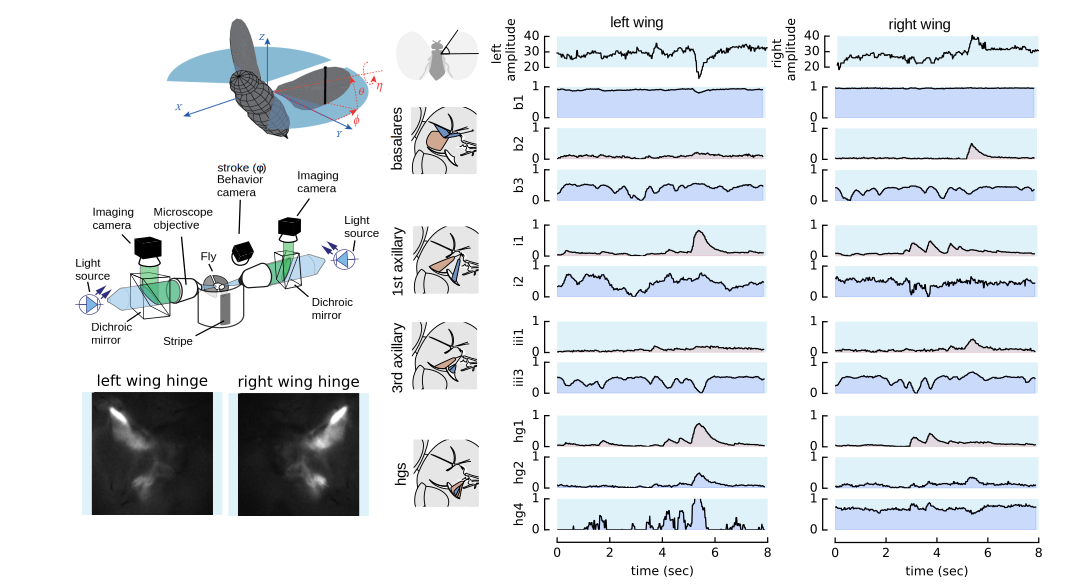

In [29]:
from matplotlib.animation import FuncAnimation

import figurefirst as fifi

layout = fifi.FigureLayout('paper_figure_1_v4.svg',make_mplfigures = True)

#layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['yaw_left'].fill_between(time, (mean_WBA-error), (mean_WBA + error),alpha = 0.1)

#layout.axes['yaw_right'].plot(time, mean_WBA_turn_right) #,'o',alpha = 0.2)
#layout.axes['yaw_right'].fill_between(time, (mean_WBA_turn_right-error_turn_right), (mean_WBA_turn_right + error_turn_right),alpha = 0.1)


fly = flylist[6]
snum = 1  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


###check normed signals method 


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]



fly_img = layout.axes['fly'].imshow(((fly.kine_cam_1[idxs[350]][:,:450].T[:,::-1])**.75),cmap = plt.cm.gray)  #,cmap = plt.cm.gray)**1.19
#arena_img = layout.axes['arena'].imshow(util.jpg2np(fly.arena_cam_1[idxs[0]])[:,150:650])
#ca_l_img = layout.axes['cam_l'].imshow(fly.ca_cam_left[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
#ca_r_img = layout.axes['cam_r'].imshow(fly.ca_cam_right[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['fly'].patch.set_alpha(0.0)
ca_l_img = layout.axes['l_wing'].imshow((fly.ca_cam_left[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['l_wing'].patch.set_alpha(0.0)
ca_r_img = layout.axes['r_wing'].imshow((fly.ca_cam_right[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['r_wing'].patch.set_alpha(0.0)

#layout.axes['cam_l'].set_title('left hinge')
#layout.axes['cam_r'].set_title('right hinge')
layout.axes['l_wing'].set_title('left wing hinge')
layout.axes['r_wing'].set_title('right wing hinge')

#layout.axes['arena_position'].plot(times,x,color = 'k',clip_on = False,lw = 1.5)
#layout.axes['arena_position'].set_xbound(0,times[-1])
#layout.axes['arena_position'].set_ybound(0,360)
#layout.axes['arena_position'].set_yticks([0,180,360])
#layout.axes['arena_position'].set_ylabel('arena \n orientation')
#layout.axes['arena_position'].patch.set_alpha(0.0)

#layout.axes['lmr'].plot(times,lmr,clip_on = False,color = 'k')
#layout.axes['lmr'].set_xbound(0,times[-1])
#layout.axes['lmr'].set_ylabel('left - right \n amplitude')
#layout.axes['lmr'].set_ybound(-15,15)
#layout.axes['lmr'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['l_wsa'].plot(times,l_deg,clip_on = False,color = 'k')
layout.axes['l_wsa'].set_xbound(0,times[-1])
layout.axes['l_wsa'].set_ylabel('left \n amplitude')
layout.axes['l_wsa'].patch.set_alpha(0.0)
layout.axes['l_wsa'].set_ybound(20,40)
layout.axes['l_wsa'].set_yticks([20, 30, 40])
#layout.axes['l_wsa'].set_ybound(-15,15)
#layout.axes['l_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['r_wsa'].plot(times,r_deg,clip_on = False,color = 'k')
layout.axes['r_wsa'].set_xbound(0,times[-1])
layout.axes['r_wsa'].set_ylabel('right \n amplitude')
layout.axes['r_wsa'].patch.set_alpha(0.0)
layout.axes['r_wsa'].set_ybound(20,40)
layout.axes['r_wsa'].set_yticks([20, 30, 40])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)







layout.axes['b1_l'].plot(times,b1l,color = 'k', lw = 1) 
layout.axes['b1_l'].fill_between(times, 0, b1l , color = 'b', alpha = 0.1)
layout.axes['b1_l'].patch.set_alpha(0.0)
layout.axes['b1_l'].set_ybound(0,1.0)
layout.axes['b1_l'].set_yticks([0, 1.0])
layout.axes['b1_l'].set_ylabel('b1')
layout.axes['b1_r'].plot(times,b1r ,color = 'k', lw = 1)
layout.axes['b1_r'].fill_between(times, 0, b1r , color = 'b', alpha = 0.1)
layout.axes['b1_r'].patch.set_alpha(0.0)
layout.axes['b1_r'].set_ybound(0,1.0)
layout.axes['b1_r'].set_yticks([0, 1.0])

layout.axes['b2_l'].plot(times,b2l -np.min(b2l) ,color = 'k', lw = 1)
layout.axes['b2_l'].fill_between(times, 0, b2l -np.min(b2l) , color = 'r', alpha = 0.1)
layout.axes['b2_l'].patch.set_alpha(0.0)
layout.axes['b2_l'].set_ybound(0,1.0)
layout.axes['b2_l'].set_yticks([0, 1.0])
layout.axes['b2_l'].set_ylabel('b2')
layout.axes['b2_r'].plot(times,b2r -np.min(b2r),color = 'k', lw = 1)
layout.axes['b2_r'].fill_between(times, 0, b2r -np.min(b2r), color = 'r', alpha = 0.1)
layout.axes['b2_r'].patch.set_alpha(0.0)
layout.axes['b2_r'].set_ybound(0,1.0)
layout.axes['b2_r'].set_yticks([0, 1.0])

layout.axes['b3_l'].plot(times,b3l -np.min(b3l),color = 'k', lw = 1)
layout.axes['b3_l'].fill_between(times, 0, b3l -np.min(b3l), color = 'b', alpha = 0.1)
layout.axes['b3_l'].patch.set_alpha(0.0)
layout.axes['b3_l'].set_ybound(0,1.0)
layout.axes['b3_l'].set_yticks([0, 1.0])
layout.axes['b3_l'].set_ylabel('b3')
layout.axes['b3_r'].plot(times,b3r -np.min(b3r),color = 'k', lw = 1)
layout.axes['b3_r'].fill_between(times, 0, b3r - np.min(b3r), color = 'b', alpha = 0.1)
layout.axes['b3_r'].patch.set_alpha(0.0)
layout.axes['b3_r'].set_ybound(0,1.0)
layout.axes['b3_r'].set_yticks([0, 1.0])


layout.axes['i1_l'].plot(times,i1l-np.min(i1l),color = 'k', lw = 1)
layout.axes['i1_l'].fill_between(times, 0, i1l -np.min(i1l), color = 'r', alpha = 0.1)
layout.axes['i1_l'].patch.set_alpha(0.0)
layout.axes['i1_l'].set_ybound(0,1.0)
layout.axes['i1_l'].set_yticks([0, 1.0])
layout.axes['i1_l'].set_ylabel('i1')
layout.axes['i1_r'].plot(times,i1r -np.min(i1r),color = 'k', lw = 1)
layout.axes['i1_r'].fill_between(times, 0, i1r-np.min(i1r), color = 'r', alpha = 0.1)
layout.axes['i1_r'].patch.set_alpha(0.0)
layout.axes['i1_r'].set_ybound(0,1.0)
layout.axes['i1_r'].set_yticks([0, 1.0])

layout.axes['i2_l'].plot(times,i2l -np.min(i2l),color = 'k', lw = 1)
layout.axes['i2_l'].fill_between(times, 0, i2l -np.min(i2l), color = 'b', alpha = 0.1)
layout.axes['i2_l'].patch.set_alpha(0.0)
layout.axes['i2_l'].set_ybound(0,1.0)
layout.axes['i2_l'].set_yticks([0, 1.0])
layout.axes['i2_l'].set_ylabel('i2')
layout.axes['i2_r'].plot(times,i2r -np.min(i2r),color = 'k', lw = 1)
layout.axes['i2_r'].fill_between(times, 0, i2r -np.min(i2r), color = 'b', alpha = 0.1)
layout.axes['i2_r'].patch.set_alpha(0.0)
layout.axes['i2_r'].set_ybound(0,1.0)
layout.axes['i2_r'].set_yticks([0, 1.0])

layout.axes['iii1_l'].plot(times,iii1l-np.min(iii1l),color = 'k', lw = 1)
layout.axes['iii1_l'].fill_between(times, 0, iii1l-np.min(iii1l), color = 'r', alpha = 0.1)
layout.axes['iii1_l'].patch.set_alpha(0.0)
layout.axes['iii1_l'].set_ybound(0,1.0)
layout.axes['iii1_l'].set_yticks([0, 1.0])
layout.axes['iii1_l'].set_ylabel('iii1')
layout.axes['iii1_r'].plot(times,iii1r-np.min(iii1r),color = 'k', lw = 1)
layout.axes['iii1_r'].fill_between(times, 0, iii1r-np.min(iii1r), color = 'r', alpha = 0.1)
layout.axes['iii1_r'].patch.set_alpha(0.0)
layout.axes['iii1_r'].set_ybound(0,1.0)
layout.axes['iii1_r'].set_yticks([0, 1.0])

layout.axes['iii3_l'].plot(times,iii3l-np.min(iii3l),color = 'k', lw = 1)
layout.axes['iii3_l'].fill_between(times, 0, iii3l-np.min(iii3l), color = 'b', alpha = 0.1)
layout.axes['iii3_l'].patch.set_alpha(0.0)
layout.axes['iii3_l'].set_ybound(0,1.0)
layout.axes['iii3_l'].set_yticks([0, 1.0])
layout.axes['iii3_l'].set_ylabel('iii3')
layout.axes['iii3_r'].plot(times,iii3r-np.min(iii3r),color = 'k', lw = 1)
layout.axes['iii3_r'].fill_between(times, 0, iii3r-np.min(iii3r), color = 'b', alpha = 0.1)
layout.axes['iii3_r'].patch.set_alpha(0.0)
layout.axes['iii3_r'].set_ybound(0,1.0)
layout.axes['iii3_r'].set_yticks([0, 1.0])

layout.axes['hg1_l'].plot(times,hg1l-np.min(hg1l),color = 'k', lw = 1)
layout.axes['hg1_l'].fill_between(times, 0, hg1l-np.min(hg1l), color = 'r', alpha = 0.1)
layout.axes['hg1_l'].patch.set_alpha(0.0)
layout.axes['hg1_l'].set_ybound(0,1.0)
layout.axes['hg1_l'].set_yticks([0, 1.0])
layout.axes['hg1_l'].set_ylabel('hg1')
layout.axes['hg1_r'].plot(times,hg1r-np.min(hg1r),color = 'k', lw = 1)
layout.axes['hg1_r'].fill_between(times, 0, hg1r-np.min(hg1r), color = 'r', alpha = 0.1)
layout.axes['hg1_r'].patch.set_alpha(0.0)
layout.axes['hg1_r'].set_ybound(0,1.0)
layout.axes['hg1_r'].set_yticks([0, 1.0])

layout.axes['hg2_l'].plot(times,hg2l-np.min(hg2l),color = 'k', lw = 1)
layout.axes['hg2_l'].fill_between(times, 0, hg2l-np.min(hg2l), color = 'b', alpha = 0.1)
layout.axes['hg2_l'].patch.set_alpha(0.0)
layout.axes['hg2_l'].set_ybound(0,1.0)
layout.axes['hg2_l'].set_yticks([0, 1.0])
layout.axes['hg2_l'].set_ylabel('hg2')
layout.axes['hg2_r'].plot(times,hg2r-np.min(hg2r),color = 'k', lw = 1)
layout.axes['hg2_r'].fill_between(times, 0, hg2r-np.min(hg2r), color = 'b', alpha = 0.1)
layout.axes['hg2_r'].patch.set_alpha(0.0)
layout.axes['hg2_r'].set_ybound(0,1.0)
layout.axes['hg2_r'].set_yticks([0, 1.0])


#layout.axes['hg3_l'].plot(times,hg3l-np.min(hg3l),color = 'k', lw = 1)
#layout.axes['hg3_l'].fill_between(times, 0, hg3l-np.min(hg3l), color = 'b', alpha = 0.1)
#layout.axes['hg3_l'].patch.set_alpha(0.0)
#layout.axes['hg3_l'].set_ybound(0,1.0)
#layout.axes['hg3_l'].set_yticks([0, 1.0])
#layout.axes['hg3_l'].set_ylabel('hg3')
#layout.axes['hg3_r'].plot(times,hg3r-np.min(hg3r),color = 'k', lw = 1)
#layout.axes['hg3_r'].fill_between(times, 0, hg3r-np.min(hg3r), color = 'b', alpha = 0.1)
#layout.axes['hg3_r'].patch.set_alpha(0.0)
#layout.axes['hg3_r'].set_ybound(0,1.0)
#layout.axes['hg3_r'].set_yticks([0, 1.0])

#layout.axes['hg4_l'].plot(times,hg4l-np.min(hg4l),color = 'k', lw = 1)
#layout.axes['hg4_l'].fill_between(times, 0, hg4l-np.min(hg4l), color = 'b', alpha = 0.1)
#layout.axes['hg4_l'].patch.set_alpha(0.0)
#layout.axes['hg4_l'].set_ybound(0,1.0)
#layout.axes['hg4_l'].set_yticks([0, 1.0])
#layout.axes['hg4_l'].set_ylabel('hg4')
#layout.axes['hg4_r'].plot(times,hg4r-np.min(hg4r),color = 'k', lw = 1)
#layout.axes['hg4_r'].fill_between(times, 0, hg4r-np.min(hg4r), color = 'b', alpha = 0.1)
#layout.axes['hg4_r'].patch.set_alpha(0.0)
#layout.axes['hg4_r'].set_ybound(0,1.0)
#layout.axes['hg4_r'].set_yticks([0, 1.0])

layout.axes['hg4_l'].plot(times,hg4l,color = 'k', lw = 1)
layout.axes['hg4_l'].fill_between(times, 0, hg4l, color = 'b', alpha = 0.1)
layout.axes['hg4_l'].patch.set_alpha(0.0)
layout.axes['hg4_l'].set_ybound(0,1.0)
layout.axes['hg4_l'].set_yticks([0, 1])
layout.axes['hg4_l'].set_ylabel('hg4')
layout.axes['hg4_l'].set_xticks([0, 2, 4,6, 8])
layout.axes['hg4_l'].set_xlabel('time (sec)')
layout.axes['hg4_r'].plot(times,hg4r,color = 'k', lw = 1)
layout.axes['hg4_r'].fill_between(times, 0, hg4r, color = 'b', alpha = 0.1)
layout.axes['hg4_r'].patch.set_alpha(0.0)
layout.axes['hg4_r'].set_ybound(0,1.0)
layout.axes['hg4_r'].set_yticks([0, 1])
layout.axes['hg4_r'].set_xticks([0, 2, 4, 6, 8])
layout.axes['hg4_r'].set_xlabel('time (sec)')




#layout.axes['bias', 'arena_pos'].set_xbound(0,times[-1])
#layout.axes['bias', 'arena_pos'].set_ybound(0,360)
#layout.axes['bias', 'arena_pos'].set_yticks([0,180,360])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

#layout.axes['bias', 'lmr'].plot(times,lmr,clip_on = False,color = 'k', lw = 2)
#layout.axes['bias', 'lmr'].set_xbound(0,times[-1])
#layout.axes['bias', 'lmr'].set_ybound(-15,15)
#layout.axes['bias', 'lmr'].set_yticks([-15,0,15])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

'''
## maybe use this min subtraction###

layout.axes['bias', 'i1'].plot(times,i1l - np.min(i1l), lw = 2)
layout.axes['bias', 'i1'].plot(times,i1r - np.min(i1r), lw = 2)
layout.axes['bias', 'i1'].set_ybound(0,5)
'''


#layout.axes['bias', 'iii3'].plot(times,iii3l - np.min(iii3l), lw = 2)
#layout.axes['bias', 'iii3'].plot(times,iii3r - np.min(iii3r), lw = 2)
#layout.axes['bias', 'iii3'].set_ybound(0,5)














#layout.axes['axvline'].patch.set_alpha(0.0)
#layout.axes['axvline'].set_xbound(0,times[-1])
#fifi.mpl_functions.set_spines(layout)

#indicator = layout.axes['axvline'].axvline(0,color = 'k')

#def update(frame):
#    fly_img.set_data(fly.kine_cam_1[idxs[frame]][:,:450].T[:,::-1]**1.19)
#    #arena_img.set_data(util.jpg2np(fly.arena_cam_1[idxs[frame]])[:,150:650])
#    ca_l_img.set_data(fly.ca_cam_left[idxs[frame]][:,25:-25]**1.25)
#    ca_r_img.set_data(fly.ca_cam_right[idxs[frame]][:,25:-25]**1.25)
#    indicator.set_xdata(times[frame])

#update(0)
plt.draw()

#from matplotlib.animation import FFMpegWriter 
#Writer = FFMpegWriter 
#writer = FFMpegWriter(fps=30, metadata=dict(artist='Alysha de Souza'), 
#                      extra_args=['-vcodec', 'h264', '-pix_fmt','yuv420p'])
#ani = FuncAnimation(plt.gcf(), update, frames=np.arange(0,375))
#ani.save('cl_movie.mp4',writer = writer)




'''
include muscle maps and ROI
'''



fifi.mpl_functions.set_spines(layout)
layout.save('figure_1_v7.svg')
plt.close('all')
display(SVG('figure_1_v7.svg'))

array([-0.04770752, -0.97337796, -0.97337796, -0.37168946, -0.37168946,
       -1.09936638, -1.09936638, -0.72424104, -0.72424104, -1.05584094,
       -1.05584094, -1.00294969, -1.00294969, -1.23598367, -1.23598367,
       -1.03744782, -1.03744782, -1.12958311, -1.12958311, -0.7783036 ,
       -0.7783036 , -1.26365423, -1.19684594, -1.19684594, -0.92493235,
       -0.92493235, -1.08920297, -1.08920297, -1.07137813, -1.07137813,
       -1.07722202, -1.07722202, -0.79426199, -0.79426199, -1.14868752,
       -1.14868752, -0.75738939, -0.75738939, -0.59094934, -0.59094934,
       -0.94674774, -0.94674774, -0.74299234, -0.74299234, -0.89468767,
       -0.89468767, -0.88208892, -0.88208892, -0.72478198, -1.12339261,
       -1.12339261, -0.92143124, -0.92143124, -0.8059498 , -0.8059498 ,
       -0.93787034, -0.93787034, -0.63319482, -0.63319482, -0.71102723,
       -0.71102723, -0.90532597, -0.90532597, -0.75328399, -0.75328399,
       -0.76576818, -0.76576818, -0.73014808, -0.73014808, -0.63

In [ ]:
from matplotlib.animation import FuncAnimation

import figurefirst as fifi

layout = fifi.FigureLayout('paper_figure_1_v4.svg',make_mplfigures = True)

#layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['yaw_left'].fill_between(time, (mean_WBA-error), (mean_WBA + error),alpha = 0.1)

#layout.axes['yaw_right'].plot(time, mean_WBA_turn_right) #,'o',alpha = 0.2)
#layout.axes['yaw_right'].fill_between(time, (mean_WBA_turn_right-error_turn_right), (mean_WBA_turn_right + error_turn_right),alpha = 0.1)


fly = flylist[3]
snum = 4  #5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

x = np.rad2deg(x/10.0 *2*np.pi)
x -= np.mean(x[:100])
x += 180
lmr = np.rad2deg((l-r)/10 *2*np.pi)
l_deg = np.rad2deg((l)/10 *2*np.pi)
r_deg = np.rad2deg((r)/10 *2*np.pi)


###check normed signals method 


b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]



fly_img = layout.axes['fly'].imshow(((fly.kine_cam_1[idxs[350]][:,:450].T[:,::-1])**.75),cmap = plt.cm.gray)  #,cmap = plt.cm.gray)**1.19
#arena_img = layout.axes['arena'].imshow(util.jpg2np(fly.arena_cam_1[idxs[0]])[:,150:650])
#ca_l_img = layout.axes['cam_l'].imshow(fly.ca_cam_left[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
#ca_r_img = layout.axes['cam_r'].imshow(fly.ca_cam_right[idxs[0]][:,25:-25],
#                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['fly'].patch.set_alpha(0.0)
ca_l_img = layout.axes['l_wing'].imshow((fly.ca_cam_left[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['l_wing'].patch.set_alpha(0.0)
ca_r_img = layout.axes['r_wing'].imshow((fly.ca_cam_right[idxs[75]][:,25:-25])**1.25,
                                       cmap = plt.cm.gray,clim = (0,550))
layout.axes['r_wing'].patch.set_alpha(0.0)

#layout.axes['cam_l'].set_title('left hinge')
#layout.axes['cam_r'].set_title('right hinge')
layout.axes['l_wing'].set_title('left wing hinge')
layout.axes['r_wing'].set_title('right wing hinge')

#layout.axes['arena_position'].plot(times,x,color = 'k',clip_on = False,lw = 1.5)
#layout.axes['arena_position'].set_xbound(0,times[-1])
#layout.axes['arena_position'].set_ybound(0,360)
#layout.axes['arena_position'].set_yticks([0,180,360])
#layout.axes['arena_position'].set_ylabel('arena \n orientation')
#layout.axes['arena_position'].patch.set_alpha(0.0)

#layout.axes['lmr'].plot(times,lmr,clip_on = False,color = 'k')
#layout.axes['lmr'].set_xbound(0,times[-1])
#layout.axes['lmr'].set_ylabel('left - right \n amplitude')
#layout.axes['lmr'].set_ybound(-15,15)
#layout.axes['lmr'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['l_wsa'].plot(times,l_deg,clip_on = False,color = 'k')
layout.axes['l_wsa'].set_xbound(0,times[-1])
layout.axes['l_wsa'].set_ylabel('left \n amplitude')
layout.axes['l_wsa'].patch.set_alpha(0.0)
layout.axes['l_wsa'].set_ybound(20,40)
layout.axes['l_wsa'].set_yticks([20, 30, 40])
#layout.axes['l_wsa'].set_ybound(-15,15)
#layout.axes['l_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)

layout.axes['r_wsa'].plot(times,r_deg,clip_on = False,color = 'k')
layout.axes['r_wsa'].set_xbound(0,times[-1])
layout.axes['r_wsa'].set_ylabel('right \n amplitude')
layout.axes['r_wsa'].patch.set_alpha(0.0)
layout.axes['r_wsa'].set_ybound(20,40)
layout.axes['r_wsa'].set_yticks([20, 30, 40])
#layout.axes['r_wsa'].set_ybound(-15,15)
#layout.axes['r_wsa'].set_yticks([-15,0,15])
#layout.axes['arena_position'].patch.set_alpha(0.0)







layout.axes['b1_l'].plot(times,b1l,color = 'k', lw = 1) 
layout.axes['b1_l'].fill_between(times, 0, b1l , color = 'b', alpha = 0.1)
layout.axes['b1_l'].patch.set_alpha(0.0)
layout.axes['b1_l'].set_ybound(0,1.0)
layout.axes['b1_l'].set_yticks([0, 1.0])
layout.axes['b1_l'].set_ylabel('b1')
layout.axes['b1_r'].plot(times,b1r ,color = 'k', lw = 1)
layout.axes['b1_r'].fill_between(times, 0, b1r , color = 'b', alpha = 0.1)
layout.axes['b1_r'].patch.set_alpha(0.0)
layout.axes['b1_r'].set_ybound(0,1.0)
layout.axes['b1_r'].set_yticks([0, 1.0])

layout.axes['b2_l'].plot(times,b2l -np.min(b2l) ,color = 'k', lw = 1)
layout.axes['b2_l'].fill_between(times, 0, b2l -np.min(b2l) , color = 'r', alpha = 0.1)
layout.axes['b2_l'].patch.set_alpha(0.0)
layout.axes['b2_l'].set_ybound(0,1.0)
layout.axes['b2_l'].set_yticks([0, 1.0])
layout.axes['b2_l'].set_ylabel('b2')
layout.axes['b2_r'].plot(times,b2r -np.min(b2r),color = 'k', lw = 1)
layout.axes['b2_r'].fill_between(times, 0, b2r -np.min(b2r), color = 'r', alpha = 0.1)
layout.axes['b2_r'].patch.set_alpha(0.0)
layout.axes['b2_r'].set_ybound(0,1.0)
layout.axes['b2_r'].set_yticks([0, 1.0])

layout.axes['b3_l'].plot(times,b3l -np.min(b3l),color = 'k', lw = 1)
layout.axes['b3_l'].fill_between(times, 0, b3l -np.min(b3l), color = 'b', alpha = 0.1)
layout.axes['b3_l'].patch.set_alpha(0.0)
layout.axes['b3_l'].set_ybound(0,1.0)
layout.axes['b3_l'].set_yticks([0, 1.0])
layout.axes['b3_l'].set_ylabel('b3')
layout.axes['b3_r'].plot(times,b3r -np.min(b3r),color = 'k', lw = 1)
layout.axes['b3_r'].fill_between(times, 0, b3r - np.min(b3r), color = 'b', alpha = 0.1)
layout.axes['b3_r'].patch.set_alpha(0.0)
layout.axes['b3_r'].set_ybound(0,1.0)
layout.axes['b3_r'].set_yticks([0, 1.0])


layout.axes['i1_l'].plot(times,i1l-np.min(i1l),color = 'k', lw = 1)
layout.axes['i1_l'].fill_between(times, 0, i1l -np.min(i1l), color = 'r', alpha = 0.1)
layout.axes['i1_l'].patch.set_alpha(0.0)
layout.axes['i1_l'].set_ybound(0,1.0)
layout.axes['i1_l'].set_yticks([0, 1.0])
layout.axes['i1_l'].set_ylabel('i1')
layout.axes['i1_r'].plot(times,i1r -np.min(i1r),color = 'k', lw = 1)
layout.axes['i1_r'].fill_between(times, 0, i1r-np.min(i1r), color = 'r', alpha = 0.1)
layout.axes['i1_r'].patch.set_alpha(0.0)
layout.axes['i1_r'].set_ybound(0,1.0)
layout.axes['i1_r'].set_yticks([0, 1.0])

layout.axes['i2_l'].plot(times,i2l -np.min(i2l),color = 'k', lw = 1)
layout.axes['i2_l'].fill_between(times, 0, i2l -np.min(i2l), color = 'b', alpha = 0.1)
layout.axes['i2_l'].patch.set_alpha(0.0)
layout.axes['i2_l'].set_ybound(0,1.0)
layout.axes['i2_l'].set_yticks([0, 1.0])
layout.axes['i2_l'].set_ylabel('i2')
layout.axes['i2_r'].plot(times,i2r -np.min(i2r),color = 'k', lw = 1)
layout.axes['i2_r'].fill_between(times, 0, i2r -np.min(i2r), color = 'b', alpha = 0.1)
layout.axes['i2_r'].patch.set_alpha(0.0)
layout.axes['i2_r'].set_ybound(0,1.0)
layout.axes['i2_r'].set_yticks([0, 1.0])

layout.axes['iii1_l'].plot(times,iii1l-np.min(iii1l),color = 'k', lw = 1)
layout.axes['iii1_l'].fill_between(times, 0, iii1l-np.min(iii1l), color = 'r', alpha = 0.1)
layout.axes['iii1_l'].patch.set_alpha(0.0)
layout.axes['iii1_l'].set_ybound(0,1.0)
layout.axes['iii1_l'].set_yticks([0, 1.0])
layout.axes['iii1_l'].set_ylabel('iii1')
layout.axes['iii1_r'].plot(times,iii1r-np.min(iii1r),color = 'k', lw = 1)
layout.axes['iii1_r'].fill_between(times, 0, iii1r-np.min(iii1r), color = 'r', alpha = 0.1)
layout.axes['iii1_r'].patch.set_alpha(0.0)
layout.axes['iii1_r'].set_ybound(0,1.0)
layout.axes['iii1_r'].set_yticks([0, 1.0])

layout.axes['iii3_l'].plot(times,iii3l-np.min(iii3l),color = 'k', lw = 1)
layout.axes['iii3_l'].fill_between(times, 0, iii3l-np.min(iii3l), color = 'b', alpha = 0.1)
layout.axes['iii3_l'].patch.set_alpha(0.0)
layout.axes['iii3_l'].set_ybound(0,1.0)
layout.axes['iii3_l'].set_yticks([0, 1.0])
layout.axes['iii3_l'].set_ylabel('iii3')
layout.axes['iii3_r'].plot(times,iii3r-np.min(iii3r),color = 'k', lw = 1)
layout.axes['iii3_r'].fill_between(times, 0, iii3r-np.min(iii3r), color = 'b', alpha = 0.1)
layout.axes['iii3_r'].patch.set_alpha(0.0)
layout.axes['iii3_r'].set_ybound(0,1.0)
layout.axes['iii3_r'].set_yticks([0, 1.0])

layout.axes['hg1_l'].plot(times,hg1l-np.min(hg1l),color = 'k', lw = 1)
layout.axes['hg1_l'].fill_between(times, 0, hg1l-np.min(hg1l), color = 'r', alpha = 0.1)
layout.axes['hg1_l'].patch.set_alpha(0.0)
layout.axes['hg1_l'].set_ybound(0,1.0)
layout.axes['hg1_l'].set_yticks([0, 1.0])
layout.axes['hg1_l'].set_ylabel('hg1')
layout.axes['hg1_r'].plot(times,hg1r-np.min(hg1r),color = 'k', lw = 1)
layout.axes['hg1_r'].fill_between(times, 0, hg1r-np.min(hg1r), color = 'r', alpha = 0.1)
layout.axes['hg1_r'].patch.set_alpha(0.0)
layout.axes['hg1_r'].set_ybound(0,1.0)
layout.axes['hg1_r'].set_yticks([0, 1.0])

layout.axes['hg2_l'].plot(times,hg2l-np.min(hg2l),color = 'k', lw = 1)
layout.axes['hg2_l'].fill_between(times, 0, hg2l-np.min(hg2l), color = 'b', alpha = 0.1)
layout.axes['hg2_l'].patch.set_alpha(0.0)
layout.axes['hg2_l'].set_ybound(0,1.0)
layout.axes['hg2_l'].set_yticks([0, 1.0])
layout.axes['hg2_l'].set_ylabel('hg2')
layout.axes['hg2_r'].plot(times,hg2r-np.min(hg2r),color = 'k', lw = 1)
layout.axes['hg2_r'].fill_between(times, 0, hg2r-np.min(hg2r), color = 'b', alpha = 0.1)
layout.axes['hg2_r'].patch.set_alpha(0.0)
layout.axes['hg2_r'].set_ybound(0,1.0)
layout.axes['hg2_r'].set_yticks([0, 1.0])


#layout.axes['hg3_l'].plot(times,hg3l-np.min(hg3l),color = 'k', lw = 1)
#layout.axes['hg3_l'].fill_between(times, 0, hg3l-np.min(hg3l), color = 'b', alpha = 0.1)
#layout.axes['hg3_l'].patch.set_alpha(0.0)
#layout.axes['hg3_l'].set_ybound(0,1.0)
#layout.axes['hg3_l'].set_yticks([0, 1.0])
#layout.axes['hg3_l'].set_ylabel('hg3')
#layout.axes['hg3_r'].plot(times,hg3r-np.min(hg3r),color = 'k', lw = 1)
#layout.axes['hg3_r'].fill_between(times, 0, hg3r-np.min(hg3r), color = 'b', alpha = 0.1)
#layout.axes['hg3_r'].patch.set_alpha(0.0)
#layout.axes['hg3_r'].set_ybound(0,1.0)
#layout.axes['hg3_r'].set_yticks([0, 1.0])

#layout.axes['hg4_l'].plot(times,hg4l-np.min(hg4l),color = 'k', lw = 1)
#layout.axes['hg4_l'].fill_between(times, 0, hg4l-np.min(hg4l), color = 'b', alpha = 0.1)
#layout.axes['hg4_l'].patch.set_alpha(0.0)
#layout.axes['hg4_l'].set_ybound(0,1.0)
#layout.axes['hg4_l'].set_yticks([0, 1.0])
#layout.axes['hg4_l'].set_ylabel('hg4')
#layout.axes['hg4_r'].plot(times,hg4r-np.min(hg4r),color = 'k', lw = 1)
#layout.axes['hg4_r'].fill_between(times, 0, hg4r-np.min(hg4r), color = 'b', alpha = 0.1)
#layout.axes['hg4_r'].patch.set_alpha(0.0)
#layout.axes['hg4_r'].set_ybound(0,1.0)
#layout.axes['hg4_r'].set_yticks([0, 1.0])

layout.axes['hg4_l'].plot(times,hg4l,color = 'k', lw = 1)
layout.axes['hg4_l'].fill_between(times, 0, hg4l, color = 'b', alpha = 0.1)
layout.axes['hg4_l'].patch.set_alpha(0.0)
layout.axes['hg4_l'].set_ybound(0,1.0)
layout.axes['hg4_l'].set_yticks([0, 1])
layout.axes['hg4_l'].set_ylabel('hg4')
layout.axes['hg4_l'].set_xticks([0, 2, 4, 8])
layout.axes['hg4_l'].set_xlabel('time (sec)')
layout.axes['hg4_r'].plot(times,hg4r,color = 'k', lw = 1)
layout.axes['hg4_r'].fill_between(times, 0, hg4r, color = 'b', alpha = 0.1)
layout.axes['hg4_r'].patch.set_alpha(0.0)
layout.axes['hg4_r'].set_ybound(0,1.0)
layout.axes['hg4_r'].set_yticks([0, 1])
layout.axes['hg4_r'].set_xticks([0, 2, 4, 8])
layout.axes['hg4_r'].set_xlabel('time (sec)')




#layout.axes['bias', 'arena_pos'].set_xbound(0,times[-1])
#layout.axes['bias', 'arena_pos'].set_ybound(0,360)
#layout.axes['bias', 'arena_pos'].set_yticks([0,180,360])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

#layout.axes['bias', 'lmr'].plot(times,lmr,clip_on = False,color = 'k', lw = 2)
#layout.axes['bias', 'lmr'].set_xbound(0,times[-1])
#layout.axes['bias', 'lmr'].set_ybound(-15,15)
#layout.axes['bias', 'lmr'].set_yticks([-15,0,15])
#layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

'''
## maybe use this min subtraction###

layout.axes['bias', 'i1'].plot(times,i1l - np.min(i1l), lw = 2)
layout.axes['bias', 'i1'].plot(times,i1r - np.min(i1r), lw = 2)
layout.axes['bias', 'i1'].set_ybound(0,5)
'''


#layout.axes['bias', 'iii3'].plot(times,iii3l - np.min(iii3l), lw = 2)
#layout.axes['bias', 'iii3'].plot(times,iii3r - np.min(iii3r), lw = 2)
#layout.axes['bias', 'iii3'].set_ybound(0,5)














#layout.axes['axvline'].patch.set_alpha(0.0)
#layout.axes['axvline'].set_xbound(0,times[-1])
#fifi.mpl_functions.set_spines(layout)

#indicator = layout.axes['axvline'].axvline(0,color = 'k')

#def update(frame):
#    fly_img.set_data(fly.kine_cam_1[idxs[frame]][:,:450].T[:,::-1]**1.19)
#    #arena_img.set_data(util.jpg2np(fly.arena_cam_1[idxs[frame]])[:,150:650])
#    ca_l_img.set_data(fly.ca_cam_left[idxs[frame]][:,25:-25]**1.25)
#    ca_r_img.set_data(fly.ca_cam_right[idxs[frame]][:,25:-25]**1.25)
#    indicator.set_xdata(times[frame])

#update(0)
plt.draw()

#from matplotlib.animation import FFMpegWriter 
#Writer = FFMpegWriter 
#writer = FFMpegWriter(fps=30, metadata=dict(artist='Alysha de Souza'), 
#                      extra_args=['-vcodec', 'h264', '-pix_fmt','yuv420p'])
#ani = FuncAnimation(plt.gcf(), update, frames=np.arange(0,375))
#ani.save('cl_movie.mp4',writer = writer)




'''
include muscle maps and ROI
'''



fifi.mpl_functions.set_spines(layout)
layout.save('figure_1_v7.svg')
plt.close('all')
display(SVG('figure_1_v7.svg'))

In [78]:
####################
# plot of summary data
####################

from matplotlib.animation import FuncAnimation

import figurefirst as fifi
layout = fifi.FigureLayout('bias_movie_reveal.svg',make_mplfigures = True)

fly = flylist[1]
snum = 5

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]

x = np.rad2deg(x/10.0 *2*np.pi)
lmr = np.rad2deg((l-r)/10 *2*np.pi)
times = np.arange(len(x))*0.02

b2l = fly.normed_signals['left', 'b2'][idxs]
b2r = fly.normed_signals['right', 'b2'][idxs]

i1l = fly.normed_signals['left', 'i1'][idxs]
i1r = fly.normed_signals['right', 'i1'][idxs]

iii3l = fly.normed_signals['left', 'iii3'][idxs]
iii3r = fly.normed_signals['right', 'iii3'][idxs]

hg4l = fly.normed_signals['left', 'hg4'][idxs]
hg4r = fly.normed_signals['right', 'hg4'][idxs]

hg1l = fly.normed_signals['left', 'hg1'][idxs]
hg1r = fly.normed_signals['right', 'hg1'][idxs]

layout.axes['cl', 'arena_pos'].plot(times,x,c = 'k', lw = 2)
layout.axes['cl', 'arena_pos'].set_xbound(0,times[-1])
layout.axes['cl', 'arena_pos'].set_ybound(0,360)
layout.axes['cl', 'arena_pos'].set_yticks([0,180,360])
layout.axes['cl', 'arena_pos'].set_ylabel('arena \n orientation',size = 12)
layout.axes['cl', 'arena_pos'].patch.set_alpha(0.0)

layout.axes['cl', 'lmr'].plot(times,lmr,clip_on = False,c = 'k',lw = 2)
layout.axes['cl', 'lmr'].set_xbound(0,times[-1])
layout.axes['cl', 'lmr'].set_ylabel('left - right \n amplitude',size = 12)
layout.axes['cl', 'lmr'].set_ybound(-15,15)
layout.axes['cl', 'lmr'].set_yticks([-15,0,15])
layout.axes['cl', 'arena_pos'].patch.set_alpha(0.0)

layout.axes['cl', 'i1'].plot(times,i1l - np.min(i1l), lw = 2)
layout.axes['cl', 'i1'].plot(times,i1r - np.min(i1r), lw = 2)
layout.axes['cl', 'i1'].set_ybound(0,5)
layout.axes['cl', 'i1'].set_ylabel('i1\nz-score',size = 12)

layout.axes['cl', 'iii3'].plot(times,iii3l - np.min(iii3l), lw = 2)
layout.axes['cl', 'iii3'].plot(times,iii3r - np.min(iii3r), lw = 2)
layout.axes['cl', 'iii3'].set_ybound(0,5)
layout.axes['cl', 'iii3'].set_ylabel('iii3\nz-score',size = 12)

#######

fly = flylist[1]
snum = 4

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]

x = np.rad2deg(x/10.0 *2*np.pi)
lmr = np.rad2deg((l-r)/10 *2*np.pi)
times = np.arange(len(x))*0.02

b2l = fly.normed_signals['left', 'b2'][idxs]
b2r = fly.normed_signals['right', 'b2'][idxs]

i1l = fly.normed_signals['left', 'i1'][idxs]
i1r = fly.normed_signals['right', 'i1'][idxs]

iii3l = fly.normed_signals['left', 'iii3'][idxs]
iii3r = fly.normed_signals['right', 'iii3'][idxs]

hg4l = fly.normed_signals['left', 'hg4'][idxs]
hg4r = fly.normed_signals['right', 'hg4'][idxs]

hg1l = fly.normed_signals['left', 'hg1'][idxs]
hg1r = fly.normed_signals['right', 'hg1'][idxs]


layout.axes['bias', 'arena_pos'].plot(times,x,color = 'k', lw = 2)
layout.axes['bias', 'arena_pos'].set_xbound(0,times[-1])
layout.axes['bias', 'arena_pos'].set_ybound(0,360)
layout.axes['bias', 'arena_pos'].set_yticks([0,180,360])
layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

layout.axes['bias', 'lmr'].plot(times,lmr,clip_on = False,color = 'k', lw = 2)
layout.axes['bias', 'lmr'].set_xbound(0,times[-1])
layout.axes['bias', 'lmr'].set_ybound(-15,15)
layout.axes['bias', 'lmr'].set_yticks([-15,0,15])
layout.axes['bias', 'arena_pos'].patch.set_alpha(0.0)

layout.axes['bias', 'i1'].plot(times,i1l - np.min(i1l), lw = 2)
layout.axes['bias', 'i1'].plot(times,i1r - np.min(i1r), lw = 2)
layout.axes['bias', 'i1'].set_ybound(0,5)

layout.axes['bias', 'iii3'].plot(times,iii3l - np.min(iii3l), lw = 2)
layout.axes['bias', 'iii3'].plot(times,iii3r - np.min(iii3r), lw = 2)
layout.axes['bias', 'iii3'].set_ybound(0,5)

fifi.mpl_functions.set_spines(layout)
layout.save('no_bias.svg')

IOError: [Errno 2] No such file or directory: 'bias_movie_reveal.svg'

In [ ]:
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

    
fly_averages= []
fly_less_filtered = []

i = 0
    
for flynum in fly_nums:
    df=(left_turn_kine.loc[left_turn_kine['fly_num']==flynum])
    #df_base = (all_stim_df.loc[all_stim_df['fly_num'] == flynum])
    state_mtrx = np.vstack([df[key] for key in sorted_keys])
    average_activity = np.mean(state_mtrx,axis = 1)[:,None]
    #state_mtrx_base = np.vstack([df_base[key] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    centered_mean = np.mean(centered_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    centered_std_mean = np.mean(std_mtrx,axis = 1)[:,None]
    fly_averages.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_standard_means':
        centered_std_mean})
    fly_less_filtered.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_means':
        centered_mean})
    if i ==0:
        st_mtx = state_mtrx
        std_matrx_tosave = std_mtrx
        
    i += 1
    
left_turn_kine_means_activity_df = pd.DataFrame(fly_averages)  
left_turn_kine_means_activity_df_2 = pd.DataFrame(fly_less_filtered)


left_turn_kine_means_activity_df


In [82]:
### do a nicer job organizing this dataframe

mean_of_means = np.mean(left_turn_kine_means_activity_df ['centered_standard_means'])

muscles = left_turn_kine_means_activity_df ['Muscles'][0]

#d= pd.DataFrame()

b = 'basalare'
i = 'first_axillary'
iii = 'third_axillary'
h = 'hgs'

#d = pd.DataFrame(mean_of_means)
#d['averages_muscle_activity']= mean_of_means

averages_muscle = pd.Series(mean_of_means.flatten())

print(muscles)

wing_list = ['right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left']
sclerite_group = [b, b, b, b, b, b, h, h, h, h, h, h, h, h, i, i, i, i, iii, iii, iii, iii]
muscle_number = [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 1, 1, 3, 3]
muscle_number_landr = [1, -1, 2, -2, 3, -3, 1, -1, 2, -2, 3, -3, 4, -4, 1, -1, 2, -2, 1, -1, 3, -3]
sclerite_group_number = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
muscles = list(muscles)

d = {'averages_muscle_activity': averages_muscle, 'wing_list': wing_list, 'sclerite_group': sclerite_group, 'muscle_number': muscle_number, 'muscles': muscles , 'sclerite_group_number': sclerite_group_number, 'muscle_number_landr': muscle_number_landr  }

left_turn_kine_new_df = pd.DataFrame(d)
left_turn_kine_new_df.head()

left_turn_kine_new_df.to_csv('right_turn_kine_new_df.csv')


left_turn_kine_new_df_filledna = left_turn_kine_new_df.fillna(0)

right_muscles_left_turn = left_turn_kine_new_df_filledna.loc[(left_turn_kine_new_df_filledna['wing_list'] == 'right')]

left_muscles_left_turn = left_turn_kine_new_df_filledna.loc[(left_turn_kine_new_df_filledna['wing_list'] == 'left')]




import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r = list(left_muscles_left_turn['averages_muscle_activity'])#*(10^100))
df_rw_lt = pd.DataFrame({"x":x,"y":y,"c":c_r})


cmap = plt.cm.RdBu
#cmap = plt.cm.viridis
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df_rw_lt.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()


import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_l = list(right_muscles_right_turn['averages_muscle_activity'])#*(10^100))
df_lw_lt = pd.DataFrame({"x":x,"y":y,"c":c_l})


cmap = plt.cm.RdBu
#cmap = plt.cm.viridis
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df_lw_lt.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

NameError: name 'left_turn_kine_means_activity_df' is not defined